# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





**Import all the Python libraries that will be used in this analysis.**

In [ ]:
#Import all the libraries necessary
import pandas as pd #for data aggregation and manipulation
import numpy as np #for efficient numerical computations
import matplotlib.pyplot as plt #for data visualizations
import seaborn as sns #for data visualizations
from scipy.stats import skew #for calculating skewness
from scipy.stats import zscore #for handling outliers
import scipy.stats as stats #for calculation cdf and pdf of normal distribution
import plotly.express as px # for plotting
from datetime import datetime #for calculating current year
from sklearn.impute import SimpleImputer # for handlimg missing values

**Load the dataset from google drive.**

In [ ]:
#Mount the google drive, in order to access the files here after accepting the authentication prompt.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Convert the dataset (in the .xlsx file) into a pandas dataframe (superstore_df).
superstore_df=pd.read_excel("/content/drive/My Drive/Superstore Marketing Data.xlsx")
superstore_df

Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0   6/16/2014        0       189  ...              111   
1            0   6/15/2014        0       464  ...                7   
2            1   5/13/2014        0       134  ...               15   
3            1    ########        0        10  ...                0   
4            0    ########        0         6  ...               11   
...        ...         ...      ...       ...  ...              ...   
2235         1    ########       99       372  ...               47   
2236         0   1/22/2013       99         5  ...                3   
2237         0    ########       99       185  ...               15   
2238         0  11/29/2012       99       267  ...              149   
2239         2    ########       99       169  ...              188   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                  189           218                  1                4   
1                    0            37                  1                7   
2                    2            30                  1                3   
3                    0             0                  1                1   
4                    0            34                  2                3   
...                ...           ...                ...              ...   
2235                48            78                  2                5   
2236                 8            16                  1                1   
2237                 5            14                  2                6   
2238               165            63                  1                5   
2239                 0           144                  1                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                       4                  6                  1         1   
1                       3                  7                  5         1   
2                       2                  5                  2         0   
3                       0                  2                  7         0   
4                       1                  2                  7         1   
...                   ...                ...                ...       ...   
2235                    2                 11                  4         0   
2236                    0                  3                  8         0   
2237                    1                  5                  8         0   
2238                    4                 10                  3         0   
2239                    5                  4                  7         1   

      Complain  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2235         0  
2236         0  
2237         0  
2238         0  
2239         0  

[2240 rows x 22 columns]

##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [ ]:
#Display the no. of data points and features in the dataset.
superstore_df.shape

(2240, 22)

In [ ]:
#Print a concise summary of the dataframe, superstore_df.
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Check unique values in each variable i.e., feature.
for i in superstore_df.columns.tolist():
  print("No. of unique values in ",i,"is",superstore_df[i].nunique(),".")

No. of unique values in  Id is 2240 .
No. of unique values in  Year_Birth is 59 .
No. of unique values in  Education is 5 .
No. of unique values in  Marital_Status is 8 .
No. of unique values in  Income is 1974 .
No. of unique values in  Kidhome is 3 .
No. of unique values in  Teenhome is 3 .
No. of unique values in  Dt_Customer is 401 .
No. of unique values in  Recency is 100 .
No. of unique values in  MntWines is 776 .
No. of unique values in  MntFruits is 158 .
No. of unique values in  MntMeatProducts is 558 .
No. of unique values in  MntFishProducts is 182 .
No. of unique values in  MntSweetProducts is 177 .
No. of unique values in  MntGoldProds is 213 .
No. of unique values in  NumDealsPurchases is 15 .
No. of unique values in  NumWebPurchases is 15 .
No. of unique values in  NumCatalogPurchases is 14 .
No. of unique values in  NumStorePurchases is 14 .
No. of unique values in  NumWebVisitsMonth is 16 .
No. of unique values in  Response is 2 .
No. of unique values in  Complain is 

**Handle any null values.**

In [ ]:
# Missing Values/Null Values Count
print(superstore_df.isnull().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


Inference: Income has 2240-2216 = 24 null values. Rest all the features don't have any null values.

In [ ]:
# Calculate skewness of the "Income" column
income_skewness = skew(superstore_df['Income'].dropna())

print("Skewness of the 'Income' column:", income_skewness)

Skewness of the 'Income' column: 6.75890833886074


Inference: A skewness value of 6.76 for the "Income" column implies that the distribution is highly right-skewed. Hence, using the median for imputation would be more appropriate than using the mean, as the median is less affected by extreme values.

Also, given that there are 24 missing values out of 2240, it's generally safe to impute missing values with the median without significantly altering the distribution of the data.

In [ ]:
# Impute missing values in the "Income" column with median
income_median = superstore_df['Income'].median()
superstore_df['Income'] = superstore_df['Income'].fillna(income_median)

'''Reference:
[1]https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/#:~:text=If%20there%20are%20way%20too,%2C%20dropna%2C%20bfill%20and%20interpolate.'''

'Reference:\n[1]https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/#:~:text=If%20there%20are%20way%20too,%2C%20dropna%2C%20bfill%20and%20interpolate.'

**Check for any duplicate rows in the dataset.**

In [ ]:
# Dataset Duplicate Value Count
len(superstore_df[superstore_df.duplicated()])

0

Inference: There are no duplicate values.

**Re-categorize certain features for simplifying analysis.**

In [ ]:
#Check number of unique categories present in the "Marital_Status"

In [ ]:
superstore_df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

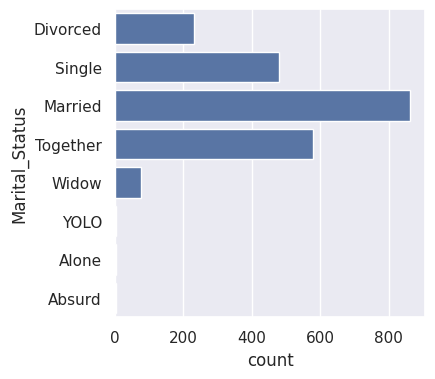

In [ ]:
#Draw the plot of all the categories present in Marital_status.
sns.countplot(superstore_df.Marital_Status)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

In [ ]:
#Combine the categories and re-group them in two categories i.e., Relationship and Single, for ease of analysis.
superstore_df['Marital_Status']=superstore_df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
superstore_df['Marital_Status']=superstore_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

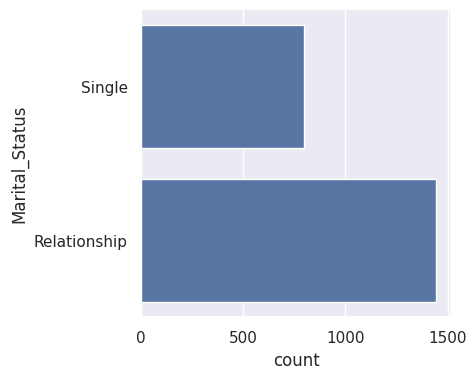

In [ ]:
#Plot the feature after grouping.
sns.countplot(superstore_df.Marital_Status)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

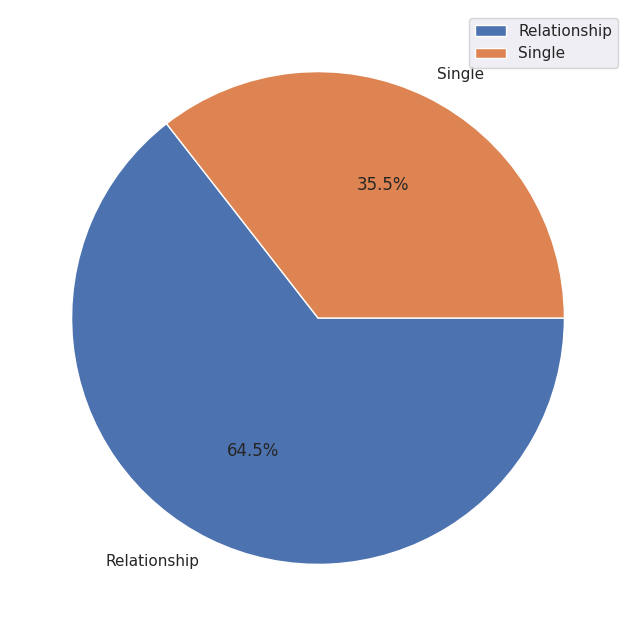

In [ ]:
#Pie chart showing distribution of customers according to their relationship status.
plt.figure(figsize=(8,8))
plt.pie(superstore_df["Marital_Status"].value_counts(), labels = ["Relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

Observation:


*   35.5% of the customers are single whereas more than 64% are in a relationship.

In [ ]:
#Count of different values present in Education
superstore_df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
#Changing category into UG and PG only for ease.
superstore_df['Education'] = superstore_df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
superstore_df['Education'] = superstore_df['Education'].replace(['Basic'], 'UG')

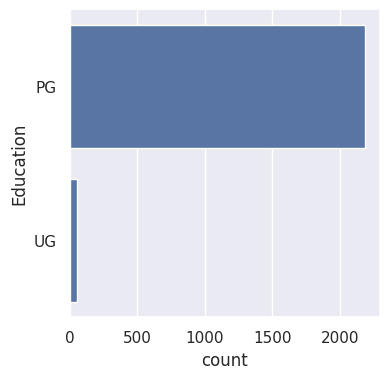

In [ ]:
#Plot the Education feature after grouping.
sns.countplot(superstore_df.Education)
sns.set(rc={'figure.figsize':(4,4)})
plt.show()

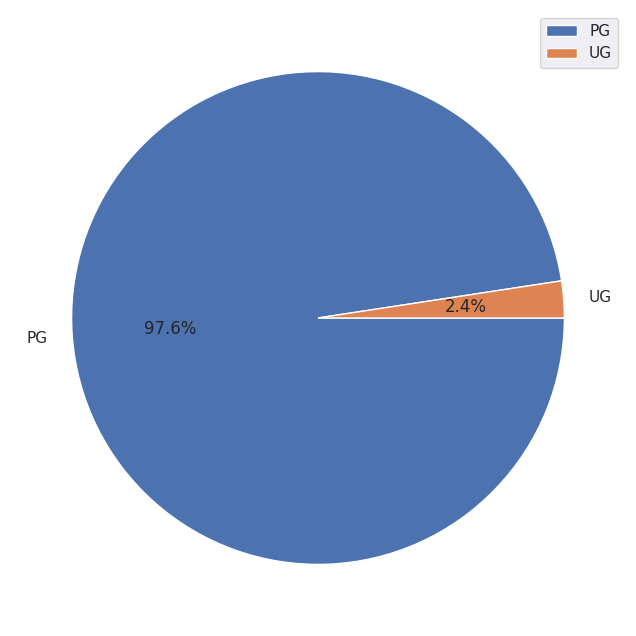

In [ ]:
#Pie-chart showing distribution of customers according to education.
plt.figure(figsize=(8,8))
plt.pie(superstore_df["Education"].value_counts(), labels = ["PG", "UG"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

Observation:


*   More than 97% of customer are from PG background. and Approx. 2% are from UG.




In [ ]:
#Check the counts in both categories.
superstore_df['Education'].value_counts()

PG    2186
UG      54
Name: Education, dtype: int64

Inference:
*   The majority of customers are post-graduate and onlty 2.4% are under-graduate.




In [ ]:
# Convert "Dt_Customer" column to datetime
superstore_df['Dt_Customer'] = pd.to_datetime(superstore_df['Dt_Customer'], errors='coerce')

In [ ]:
#To handle NaT (Not a time) values
# Count 'NaT' values
na_count = superstore_df['Dt_Customer'].isna().sum()
print("Number of 'NaN' values in 'Dt_Customer' column:", na_count)

Number of 'NaN' values in 'Dt_Customer' column: 916


In [ ]:
#Adding a column "Age" in the dataframe
# Get the current year
current_year = datetime.now().year
superstore_df['Age'] = current_year - superstore_df["Year_Birth"]

**Handle missing values:**

In [ ]:
missing_values = superstore_df.isnull().sum()
print(missing_values)

Education                0
Marital_Status           0
Income                   8
Kidhome                  0
Teenhome                 0
Recency                  0
MntWines                16
MntFruits               64
MntMeatProducts         37
MntFishProducts         58
MntSweetProducts        62
MntGoldProds            44
NumDealsPurchases       32
NumWebPurchases          4
NumCatalogPurchases      4
NumStorePurchases        0
NumWebVisitsMonth        9
Response                 0
Complain                 0
Age                      3
Expenses               222
NumTotalPurchases       37
Kids                     0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy="mean")
superstore_df = imputer.fit_transform(superstore_df)

**Drop unnecessary features from the datframe.**

In [ ]:
#Drop unnecesary columns
superstore_df=superstore_df.drop(columns=["Dt_Customer", "Year_Birth","Id"],axis=1)
superstore_df.shape

(2240, 20)

**Check correlation between the different features.**

<ipython-input-119-5b79bc177a20>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



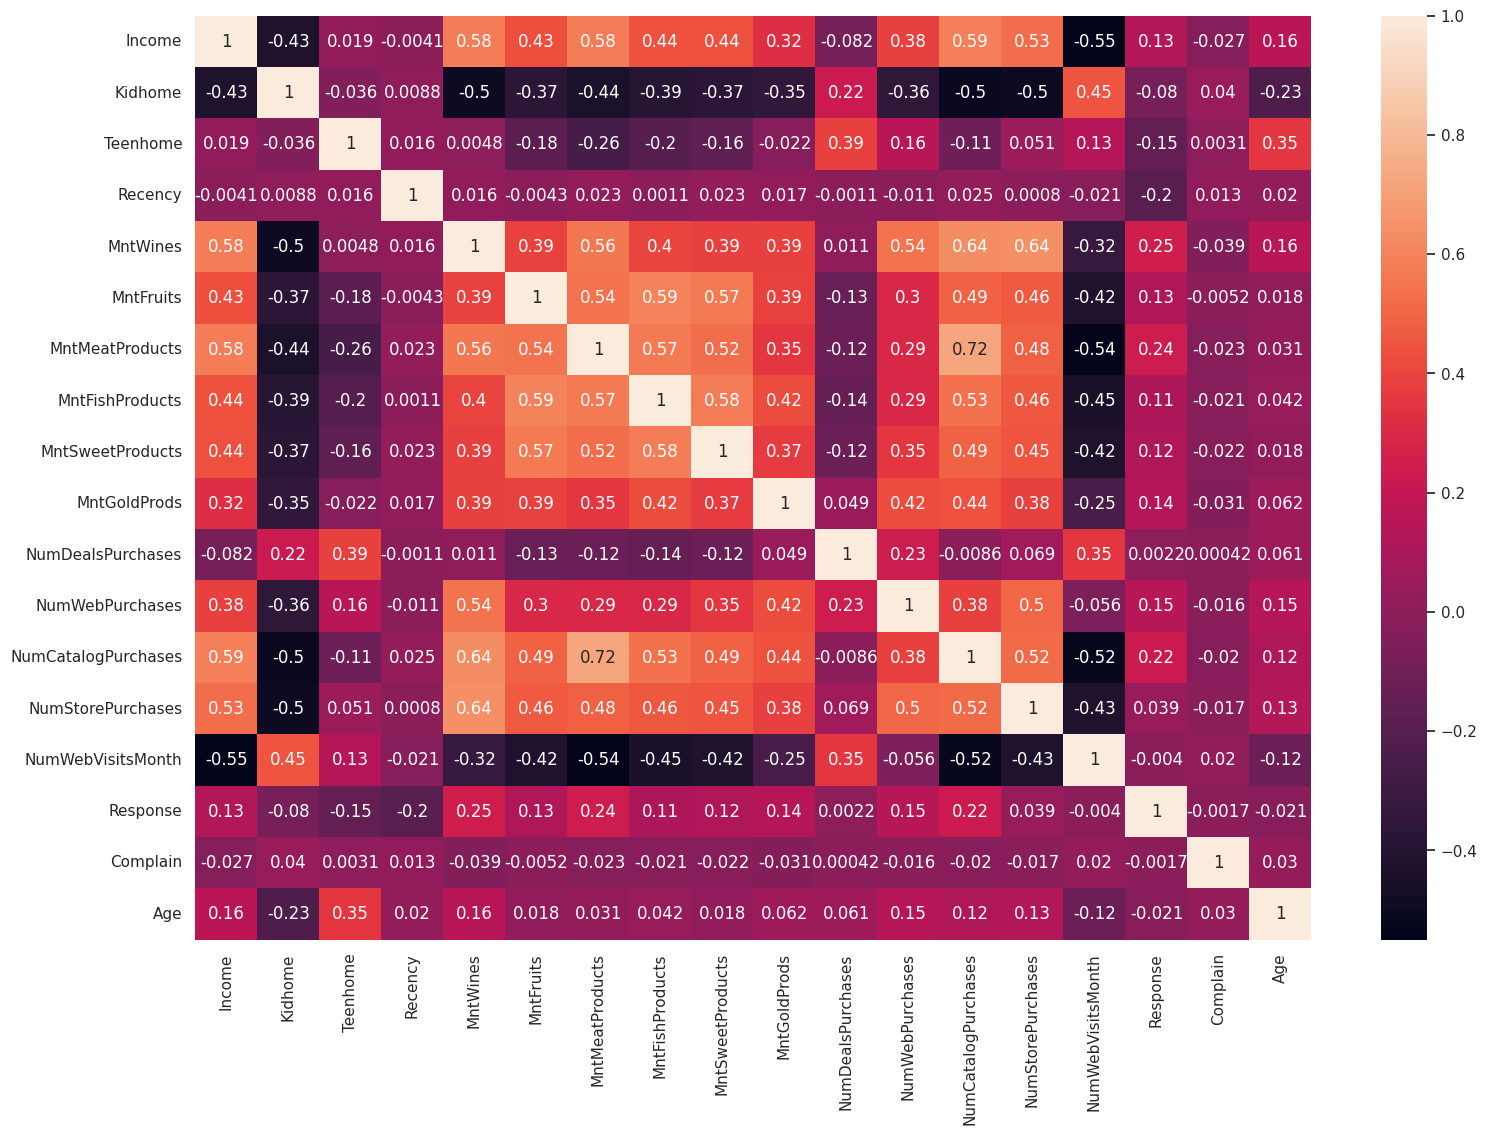

In [ ]:
#Checking correlation between the attributes
plt.figure(figsize=(18,12))
sns.heatmap(superstore_df.corr(), annot=True)
plt.show()

Observation:

*   No two columns are too much correlated with each other so we can't drop any column on the basis of correlation.

In [ ]:
'''Check for correlation by unstacking data.
It is used to calculate how one variable is correlated/ dependent on other variable.
Extreme values signify high correlation. Multicollinear variables with correlation more
than a threshold are usually dropped from the dataset.
'''
# Compute the correlation matrix
corr_matrix = superstore_df.corr()

# Unstack the correlation matrix to get correlation between pairs of variables
corr_pairs = corr_matrix.unstack()

# Filter out correlations between the same elements
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort the correlation pairs in descending order
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)[ ::2]#Every 2nd element is taken to avoid redundnacy

# Display the sorted correlation pairs
print(sorted_corr_pairs)



NumCatalogPurchases  MntMeatProducts        0.723827
NumStorePurchases    MntWines               0.642100
MntWines             NumCatalogPurchases    0.635226
MntFishProducts      MntFruits              0.594804
Income               NumCatalogPurchases    0.586826
                                              ...   
NumStorePurchases    Kidhome               -0.499683
NumCatalogPurchases  Kidhome               -0.502237
NumWebVisitsMonth    NumCatalogPurchases   -0.520364
                     MntMeatProducts       -0.539470
                     Income                -0.549785
Length: 153, dtype: float64


<ipython-input-120-bdd5635b47e0>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Observations:

*   There is a high correlation (0.72) between the amount of meat products and the number of purchases made using catalog. Thus more meat products were ordered via catalog purchase.
*   Amount of wine purchased was higher in stores and through catalog purchase (with a moderate correlation of 0.64).
*   Amount of fruits purchased has correlation with the amount of fish products purchased (with a moderate correlation of 0.59). Hence, those customers who brought fruits were more likely to bring fish as well.
*   Income has a higher correlation with purchases made through catalog (of 0.59) as compared to purchases made by visiting the store (0.53). Though these features are only moderately correlated and hence one can't make precise predictions without further analysis.







In [ ]:
def statistical_description():
  '''This function is used to calcualte the statistical information of the numerical features of the datset.
     I/P args: none
     O/P args: summary_statistics (the variable containing the descriptive statistics parameters.)
  '''
  numerical_features = superstore_df.select_dtypes(include=['int64', 'float64']) # Select only numerical features
  # Calculate mean, median, variance, standard deviation, and mode
  summary_statistics = numerical_features.describe().transpose()
  summary_statistics['median'] = numerical_features.median()
  summary_statistics['variance'] = numerical_features.var()
  summary_statistics['mode'] = numerical_features.mode().iloc[0]
  # Rename columns for clarity
  summary_statistics.rename(columns={'50%': 'median', 'count': 'count', 'mean': 'mean', 'std': 'std'}, inplace=True)
  return summary_statistics

In [ ]:
print('************ Statistical information about the dataset for numerical variables***************')
summary_statistics=statistical_description() #function call
summary_statistics

************ Statistical information about the dataset for numerical variables***************


count          mean           std     min       25%  \
Income               2240.0  52237.975446  25037.955891  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Age                  2240.0     55.194196     11.984069    28.0     47.00   

                      median       75%       max   median      variance  \
Income               51381.5  68289.75  666666.0  51381.5  6.268992e+08   
Kidhome                  0.0      1.00       2.0      0.0  2.898725e-01   
Teenhome                 0.0      1.00       2.0      0.0  2.965219e-01   
Recency                 49.0     74.00      99.0     49.0  8.388237e+02   
MntWines               173.5    504.25    1493.0    173.5  1.132978e+05   
MntFruits                8.0     33.00     199.0      8.0  1.581926e+03   
MntMeatProducts         67.0    232.00    1725.0     67.0  5.094743e+04   
MntFishProducts         12.0     50.00     259.0     12.0  2.984325e+03   
MntSweetProducts         8.0     33.00     263.0      8.0  1.704080e+03   
MntGoldProds            24.0     56.00     362.0     24.0  2.721442e+03   
NumDealsPurchases        2.0      3.00      15.0      2.0  3.733542e+00   
NumWebPurchases          4.0      6.00      27.0      4.0  7.721252e+00   
NumCatalogPurchases      2.0      4.00      28.0      2.0  8.544517e+00   
NumStorePurchases        5.0      8.00      13.0      5.0  1.056873e+01   
NumWebVisitsMonth        6.0      7.00      20.0      6.0  5.888606e+00   
Response                 0.0      0.00       1.0      0.0  1.269309e-01   
Complain                 0.0      0.00       1.0      0.0  9.291257e-03   
Age                     54.0     65.00     131.0     54.0  1.436179e+02   

                        mode  
Income               51381.5  
Kidhome                  0.0  
Teenhome                 0.0  
Recency                 56.0  
MntWines                 2.0  
MntFruits                0.0  
MntMeatProducts          7.0  
MntFishProducts          0.0  
MntSweetProducts         0.0  
MntGoldProds             1.0  
NumDealsPurchases        1.0  
NumWebPurchases          2.0  
NumCatalogPurchases      0.0  
NumStorePurchases        3.0  
NumWebVisitsMonth        7.0  
Response                 0.0  
Complain                 0.0  
Age                     48.0



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

Steps taken for data cleaning:


*   24 missing values in 'Income' feature were handled by using median imputation.
*   No duplicate values were present.
*   The features 'Marital_status' and 'Expenses' of object data type were re-grouped for easier analysis.
*   The feature'Dt_customer' was dropped since it contained 916 wrong values.
*   From the 'Year_birth' feature, 'Age' was calculated and the original feature was dropped.
* The 'Id' feature which uniquely identifies each row is dropped since it is of no use while segmenting customers.



Summary of basic statistics is presented in tabular form.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
#PS: The measure of central tendency and dispersion have already been calculated in the above Task 1.
#In Task 2, the identification and handling of outliers will be done, if found.

In [ ]:
def plot_distribution(feature, feature_name):
    """
    This function plots the distribution of a numerical feature using histograms and box plots.
    I/P args: 1.)feature: pandas Series containing the numerical feature data.
              2.)feature_name: name of the feature from the superstore_df dataframe.
    O/P args: None
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=feature)
    plt.title(f'Boxplot of {feature_name}')

    plt.tight_layout()
    plt.show()

In [ ]:
def handling_outliers(features, df):
    """
    This function helps in Visualization of the distribution of numerical features and identification and handling of outliers.

    I/P args: 1.)features: list of feature names to visualize and handle outliers for.
              2.)df: pandas DataFrame containing the dataset.
    O/P args:None
    """
    for feature_name in features:
        feature = df[feature_name]

        # Plot distribution
        plot_distribution(feature, feature_name)

        # Use Z-score method to identify outliers
        z_scores = zscore(feature)
        outliers_z = feature[abs(z_scores) > 3]

        print("Outliers using Z-score method:")
        print(outliers_z)

        # Use IQR method to identify outliers
        Q1 = feature.quantile(0.25)
        Q3 = feature.quantile(0.75)
        IQR = Q3 - Q1
        outliers_iqr = feature[(feature < (Q1 - 1.5 * IQR)) | (feature > (Q3 + 1.5 * IQR))]

        print("\nOutliers using IQR method:")
        print(outliers_iqr)

        # Remove outliers from the feature
        feature.loc[feature.isin(outliers_z)] = np.nan #Here, Z-score method is used. IQR one can also be used.

        # Plot distribution after removing outliers
        plot_distribution(feature.dropna(), f'{feature_name} (After Removing Z-score Outliers)')

        # Update the original DataFrame with the feature values after removing outliers
        df.loc[:, feature_name] = feature

        # Present the results
        print(f"\nDescriptive Statistics for {feature_name}:")
        print(feature.describe())

In [ ]:
print(superstore_df['Response'].value_counts())
print(superstore_df['Complain'].value_counts())
features_to_be_handled = superstore_df.select_dtypes(include=['int64', 'float64']).drop(columns=['Response', 'Complain','Kidhome','Teenhome'])
'''PS: Select only numerical features since non-numerical features such as Marital_status and Education have already been visualized and don't seem to have any outliers.
Also, exclude Response and Complain since they contain only 2 values i.e., 0 and 1 and the value 1 is present in low proportion in both cases.
However, that doesn't imply that all the with value 1 correspond to outliers and if outlier handling is done then there will be significant loss in information.
Also, Kidhome and Teenhome features are also removed since they are representing the number of kids and teens at home and higher values of no. of children
can't necessarily mean that they are outliers.
'''

0    1906
1     334
Name: Response, dtype: int64
0    2219
1      21
Name: Complain, dtype: int64


"PS: Select only numerical features since non-numerical features such as Marital_status and Education have already been visualized and don't seem to have any outliers.\nAlso, exclude Response and Complain since they contain only 2 values i.e., 0 and 1 and the value 1 is present in low proportion in both cases.\nHowever, that doesn't imply that all the with value 1 correspond to outliers and if outlier handling is done then there will be significant loss in information.\nAlso, Kidhome and Teenhome features are also removed since they are representing the number of kids and teens at home and higher values of no. of children\ncan't necessarily mean that they are outliers.\n"

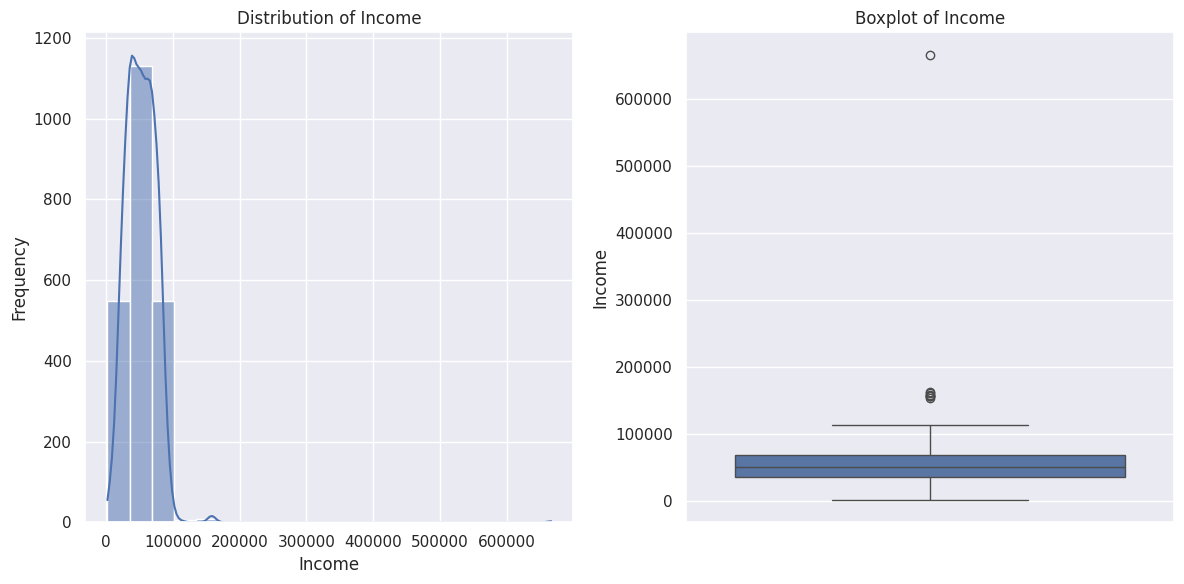

Outliers using Z-score method:
325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64

Outliers using IQR method:
325     157146.0
497     160803.0
527     666666.0
731     162397.0
853     157733.0
1826    153924.0
1925    156924.0
2204    157243.0
Name: Income, dtype: float64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



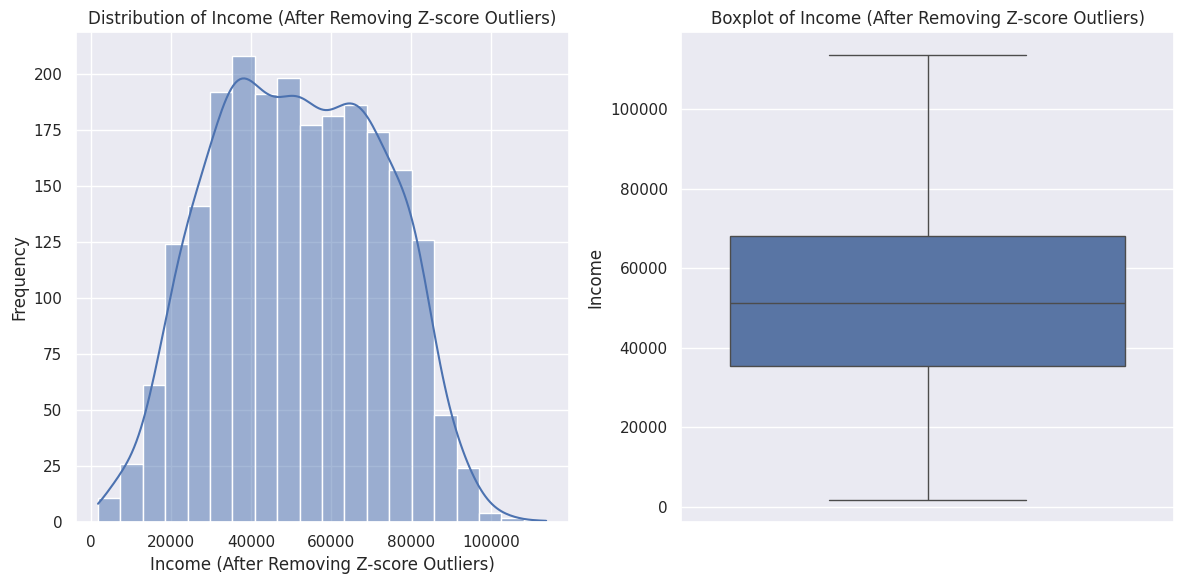


Descriptive Statistics for Income:
count      2232.000000
mean      51630.926971
std       20601.679542
min        1730.000000
25%       35434.750000
50%       51381.500000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64


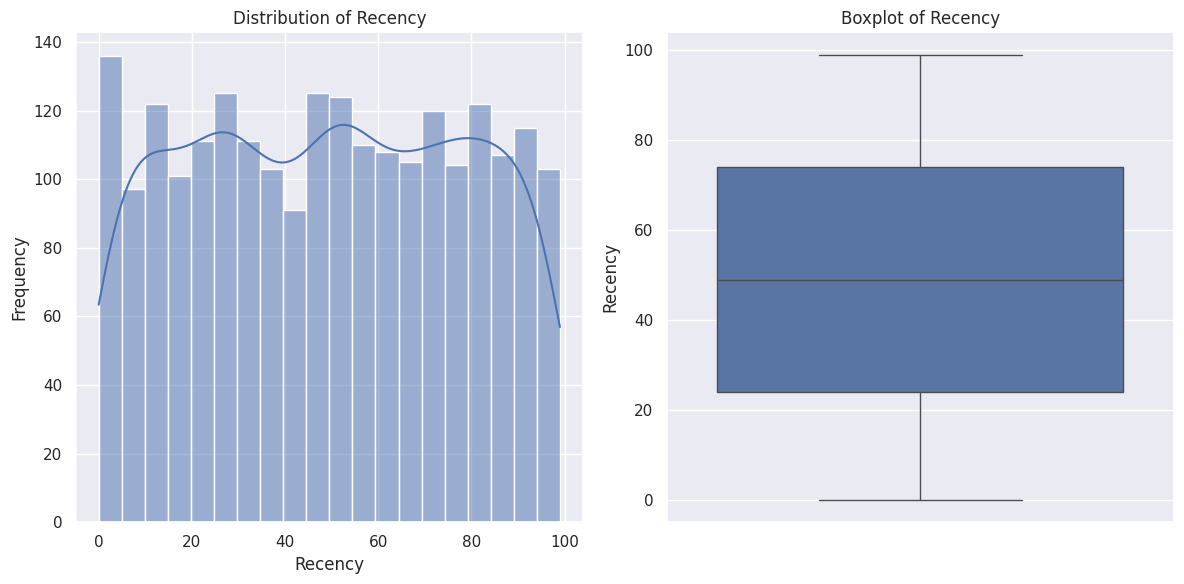

Outliers using Z-score method:
Series([], Name: Recency, dtype: int64)

Outliers using IQR method:
Series([], Name: Recency, dtype: int64)


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



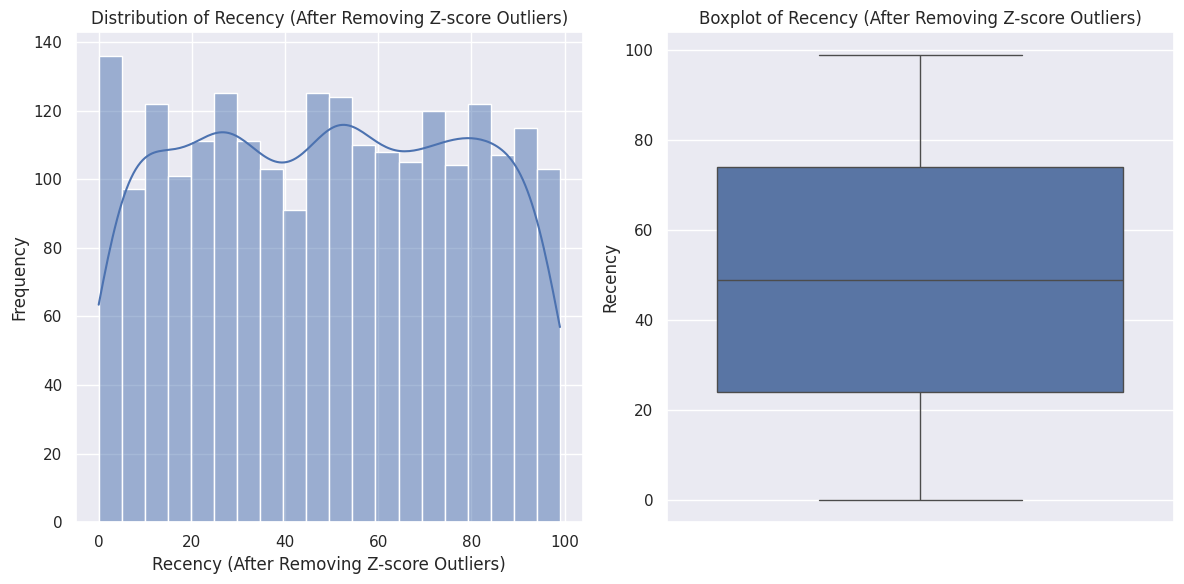


Descriptive Statistics for Recency:
count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


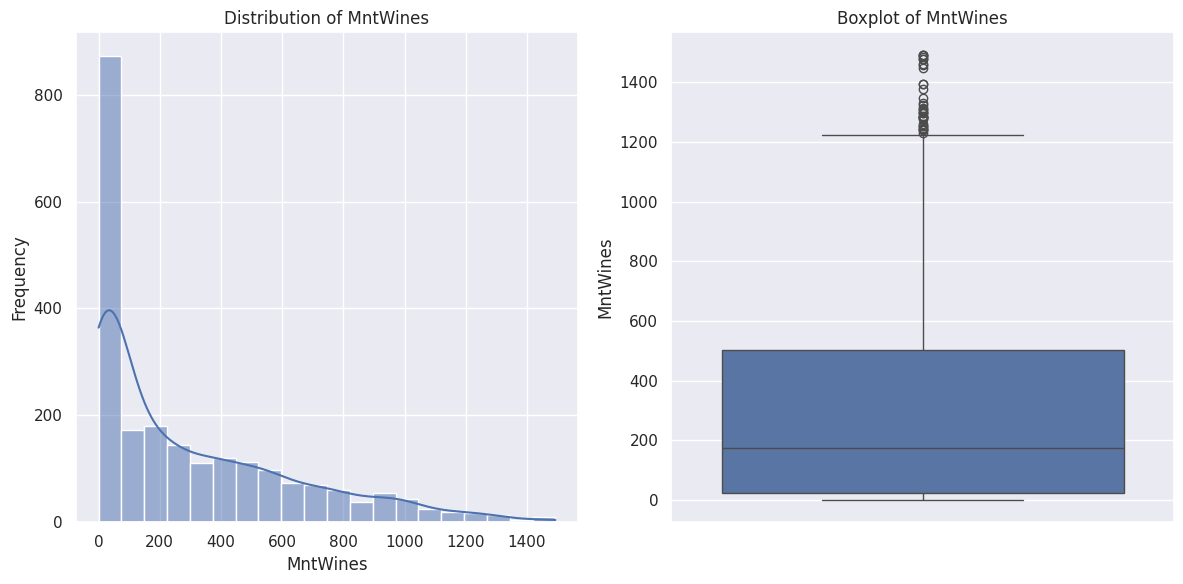

Outliers using Z-score method:
196     1462
222     1478
223     1478
472     1349
924     1332
1026    1394
1293    1493
1376    1486
1385    1492
1386    1492
1596    1459
1661    1379
1864    1315
1885    1396
1913    1324
1930    1449
Name: MntWines, dtype: int64

Outliers using IQR method:
35      1285
38      1248
77      1285
152     1296
196     1462
222     1478
223     1478
376     1302
402     1239
472     1349
624     1308
722     1230
924     1332
1003    1253
1026    1394
1054    1276
1058    1288
1293    1493
1369    1311
1376    1486
1385    1492
1386    1492
1404    1259
1417    1241
1584    1245
1596    1459
1661    1379
1740    1285
1844    1298
1864    1315
1885    1396
1913    1324
1930    1449
2002    1252
2192    1279
Name: MntWines, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



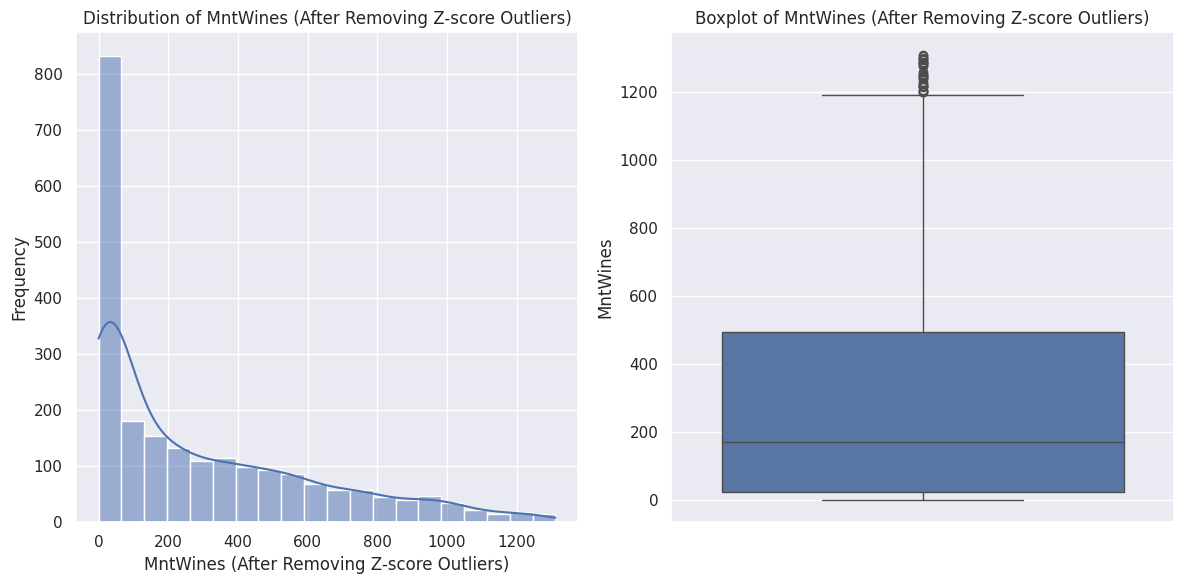


Descriptive Statistics for MntWines:
count    2224.000000
mean      295.880396
std       324.029089
min         0.000000
25%        23.000000
50%       172.000000
75%       493.000000
max      1311.000000
Name: MntWines, dtype: float64


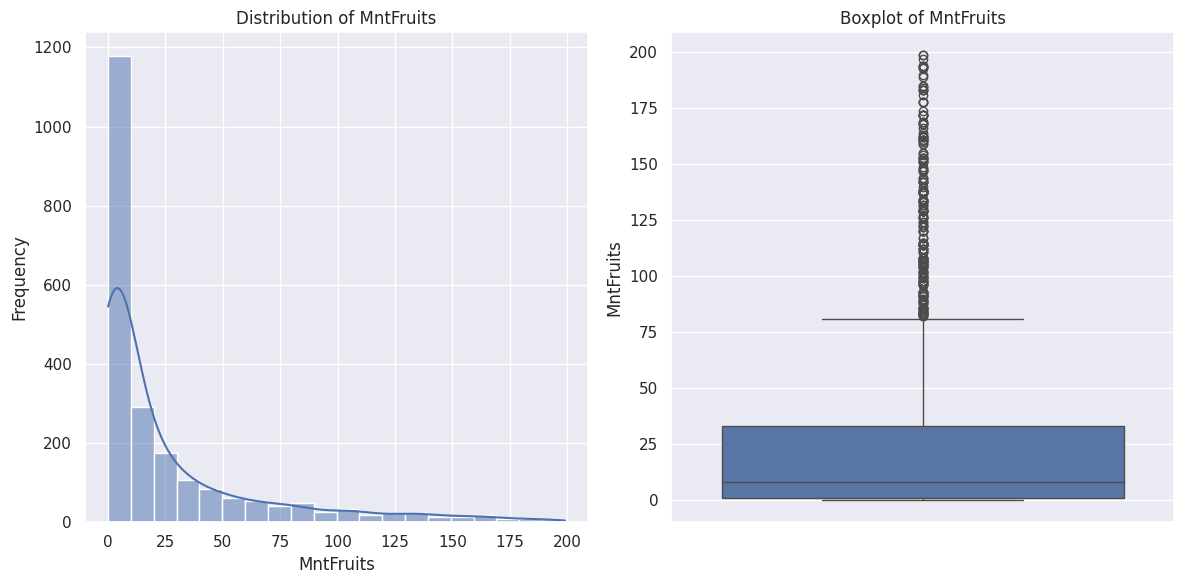

Outliers using Z-score method:
29      174
45      169
101     193
142     148
190     153
       ... 
1922    178
1959    153
1962    190
1982    163
2190    172
Name: MntFruits, Length: 64, dtype: int64

Outliers using IQR method:
0       104
5       130
12       82
29      174
45      169
       ... 
2190    172
2197    114
2215    138
2218     89
2226     86
Name: MntFruits, Length: 227, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



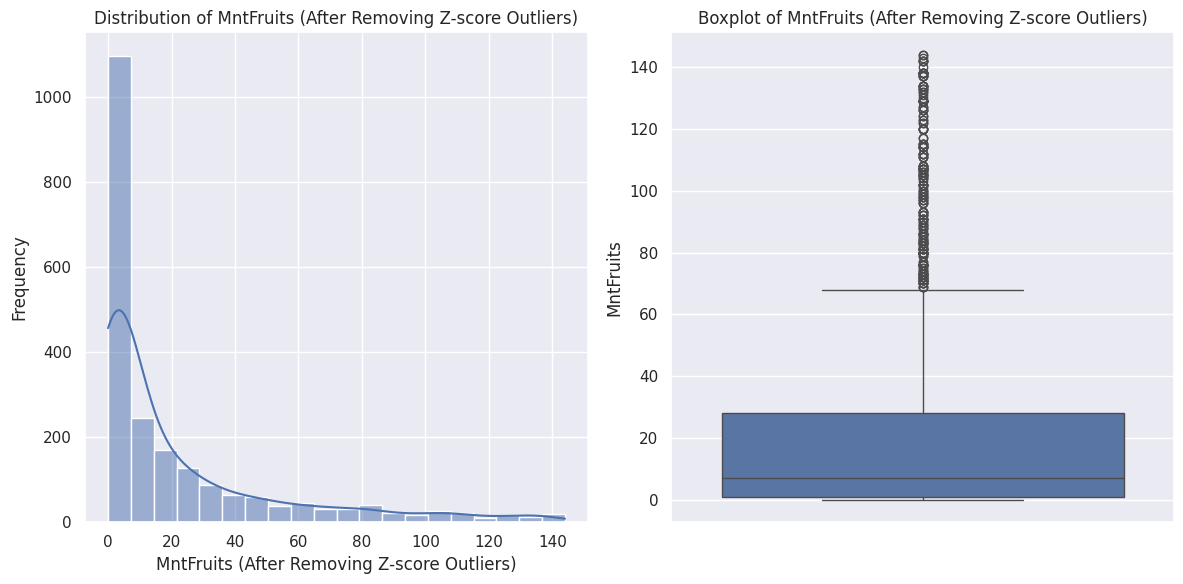


Descriptive Statistics for MntFruits:
count    2176.000000
mean       22.122243
std        31.776761
min         0.000000
25%         1.000000
50%         7.000000
75%        28.000000
max       144.000000
Name: MntFruits, dtype: float64


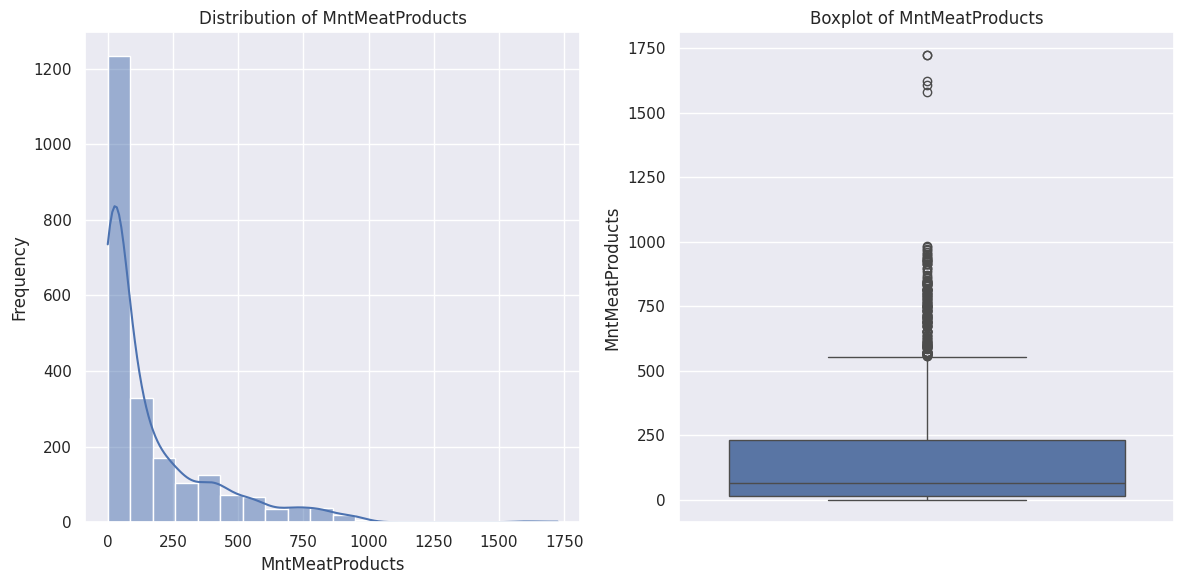

Outliers using Z-score method:
53       981
135      849
208      898
240      873
308      850
325     1725
497     1622
671      915
672      915
687      890
744      853
800      925
810      925
855      951
878      845
879      845
951      860
961     1725
973      929
994      974
1043     921
1213    1607
1338     961
1368     951
1415     899
1456     883
1535     925
1607     935
1700     940
1767     913
1839     932
1921     984
2019     864
2021     968
2055     946
2079     936
2204    1582
Name: MntMeatProducts, dtype: int64

Outliers using IQR method:
31      706
45      816
53      981
77      653
78      780
       ... 
2206    757
2212    672
2218    650
2219    774
2238    701
Name: MntMeatProducts, Length: 175, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



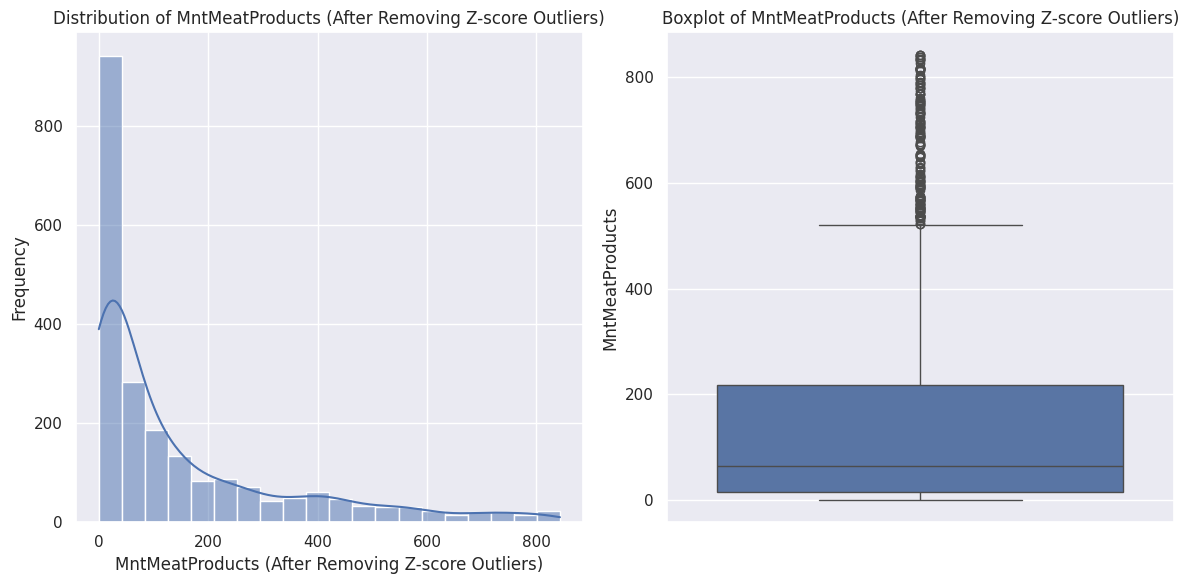


Descriptive Statistics for MntMeatProducts:
count    2203.000000
mean      152.733091
std       196.104007
min         0.000000
25%        15.000000
50%        64.000000
75%       217.000000
max       843.000000
Name: MntMeatProducts, dtype: float64


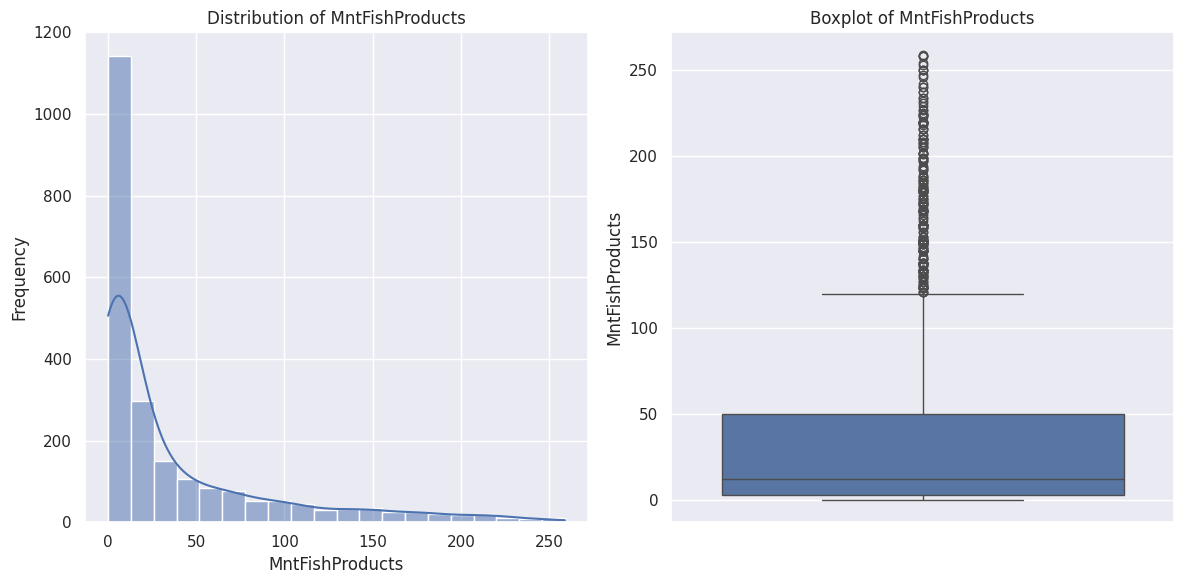

Outliers using Z-score method:
5       240
53      224
101     205
135     229
169     259
190     218
208     247
330     216
340     207
476     224
491     219
575     242
583     234
584     234
607     253
614     258
615     258
652     227
687     250
722     232
761     216
813     216
832     202
878     202
879     202
992     219
996     210
1045    205
1046    205
1055    250
1168    224
1189    237
1288    231
1324    220
1339    212
1360    224
1395    208
1503    254
1518    220
1595    246
1616    227
1634    240
1640    223
1647    210
1769    210
1770    210
1773    220
1774    220
1848    237
1853    225
1938    258
1982    212
2019    219
2055    219
2076    208
2079    207
2092    250
2141    210
Name: MntFishProducts, dtype: int64

Outliers using IQR method:
5       240
36      138
51      189
53      224
58      150
       ... 
2213    147
2223    188
2226    177
2238    149
2239    188
Name: MntFishProducts, Length: 223, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



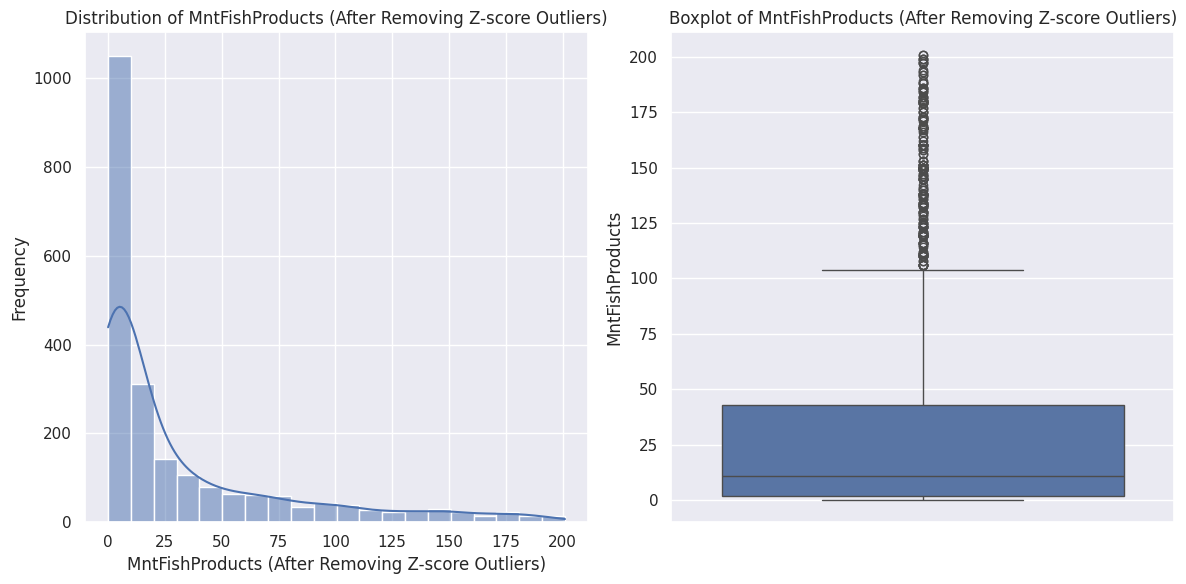


Descriptive Statistics for MntFishProducts:
count    2182.000000
mean       32.526581
std        45.724871
min         0.000000
25%         2.000000
50%        11.000000
75%        43.000000
max       201.000000
Name: MntFishProducts, dtype: float64


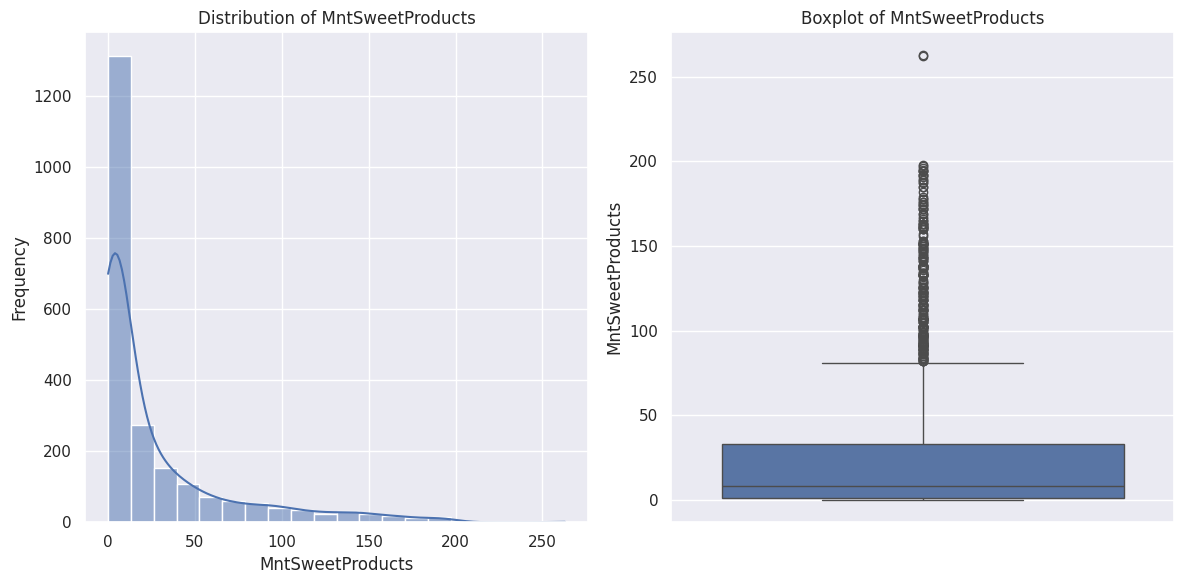

Outliers using Z-score method:
0       189
31      197
39      172
42      160
78      167
       ... 
2077    151
2105    160
2185    169
2206    163
2238    165
Name: MntSweetProducts, Length: 62, dtype: int64

Outliers using IQR method:
0       189
10       98
31      197
36       89
39      172
       ... 
2197    124
2206    163
2213    113
2218    102
2238    165
Name: MntSweetProducts, Length: 248, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



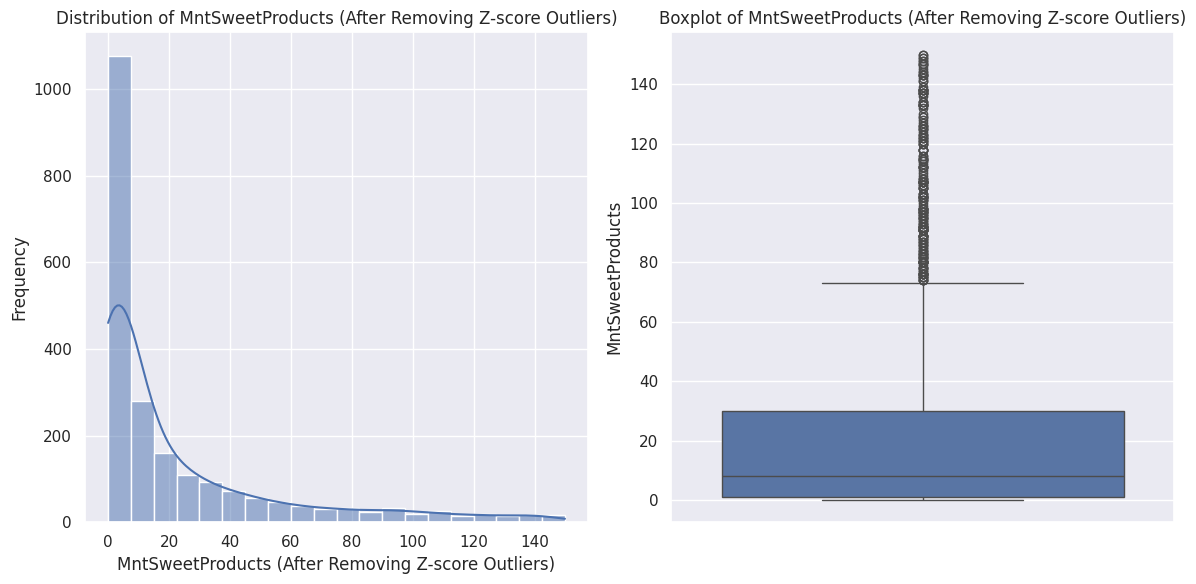


Descriptive Statistics for MntSweetProducts:
count    2178.000000
mean       22.859504
std        33.174910
min         0.000000
25%         1.000000
50%         8.000000
75%        30.000000
max       150.000000
Name: MntSweetProducts, dtype: float64


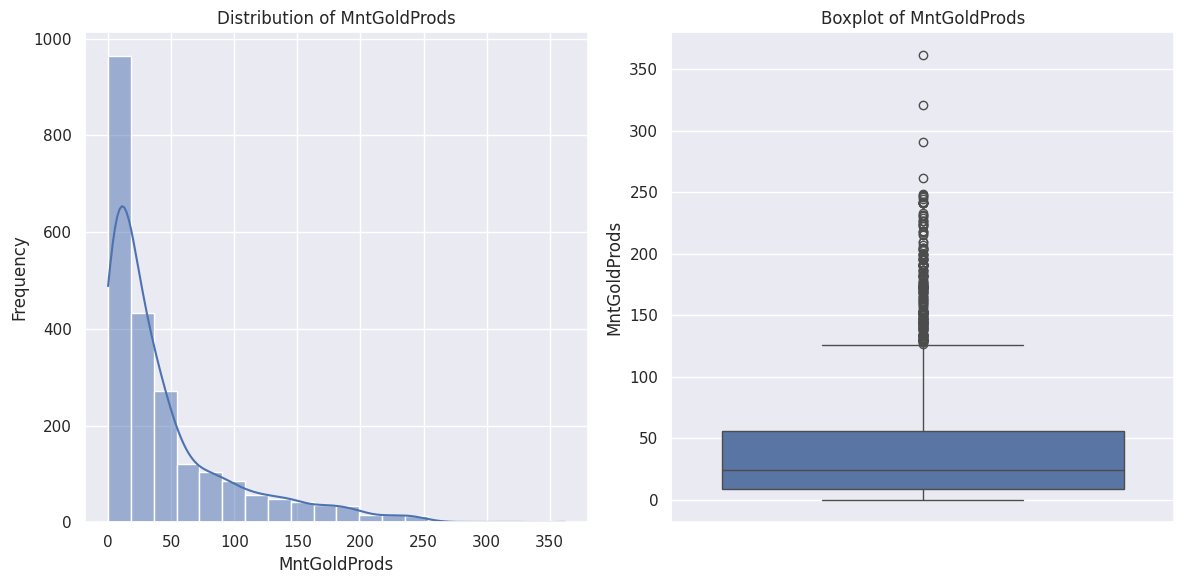

Outliers using Z-score method:
0       218
14      321
60      262
335     241
370     219
399     231
404     205
419     246
449     362
486     248
637     233
639     205
698     242
755     232
757     227
761     203
827     224
832     207
855     216
988     223
989     223
1030    247
1045    241
1046    241
1178    203
1214    241
1307    205
1322    204
1339    245
1489    224
1511    224
1571    218
1596    215
1789    249
1811    210
1843    242
1914    232
1958    229
2045    241
2060    227
2061    227
2063    291
2112    241
2151    210
Name: MntGoldProds, dtype: int64

Outliers using IQR method:
0       218
14      321
31      197
39      172
60      262
       ... 
2168    191
2175    139
2219    187
2223    183
2239    144
Name: MntGoldProds, Length: 207, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



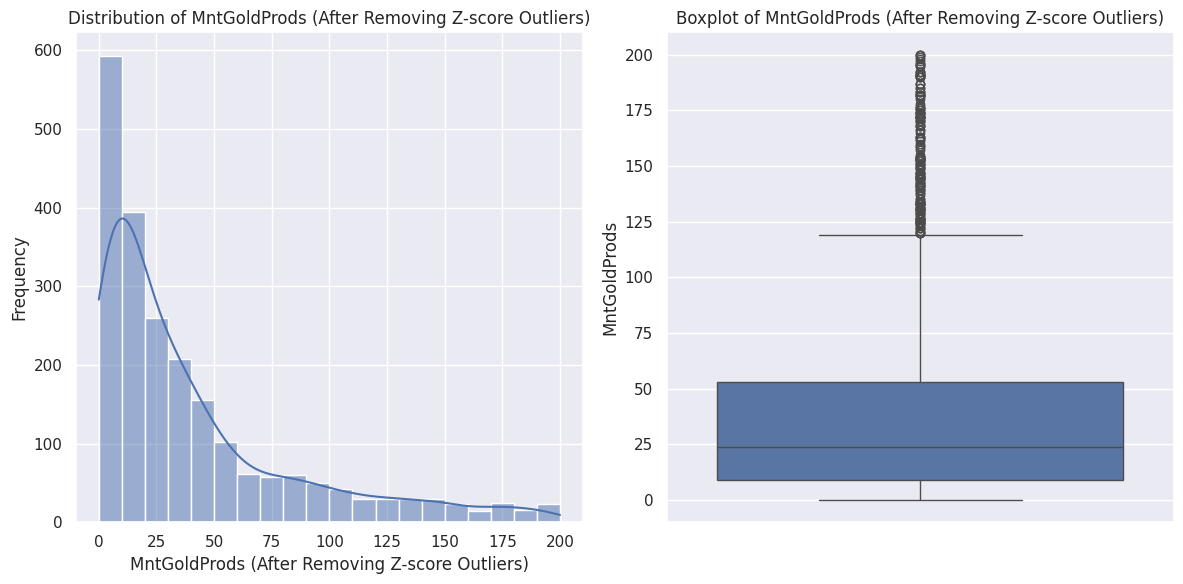


Descriptive Statistics for MntGoldProds:
count    2196.000000
mean       40.215847
std        44.950997
min         0.000000
25%         8.750000
50%        24.000000
75%        53.000000
max       200.000000
Name: MntGoldProds, dtype: float64


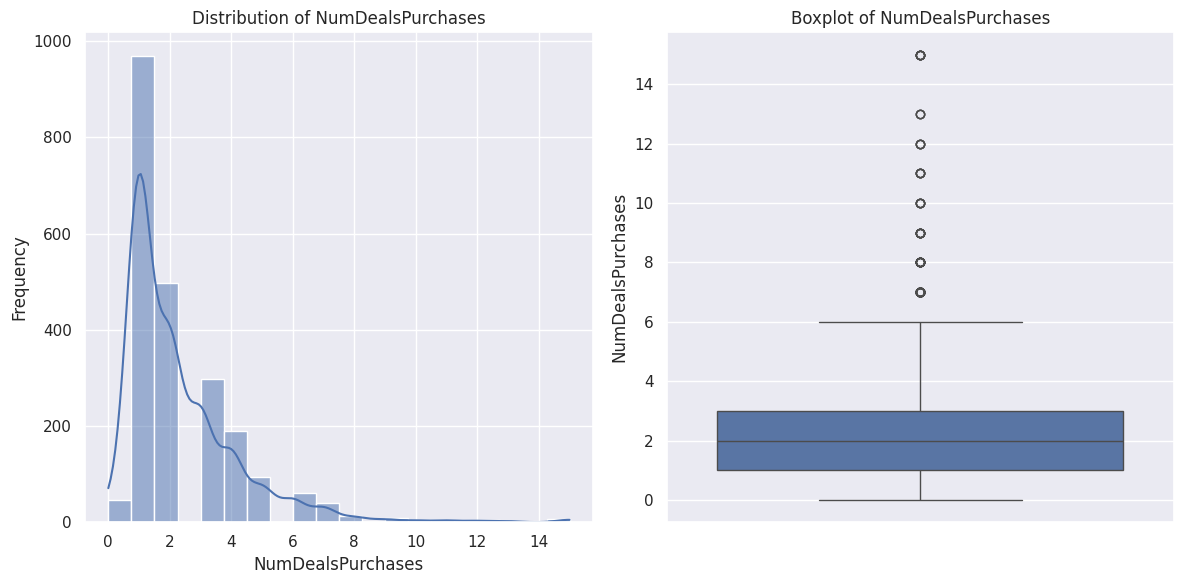

Outliers using Z-score method:
26      12
27      12
105     11
106     11
127      9
134     12
263      9
269     10
334     11
400     10
471     12
493     10
497     15
604     11
663     15
713      9
714      9
902      9
944     10
961     15
1077     9
1262    11
1407     9
1416    15
1457     9
1466    15
1640    13
1686    13
1718    15
1997    13
2204    15
2218    10
Name: NumDealsPurchases, dtype: int64

Outliers using IQR method:
26      12
27      12
64       7
105     11
106     11
        ..
2080     7
2134     7
2135     7
2204    15
2218    10
Name: NumDealsPurchases, Length: 86, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



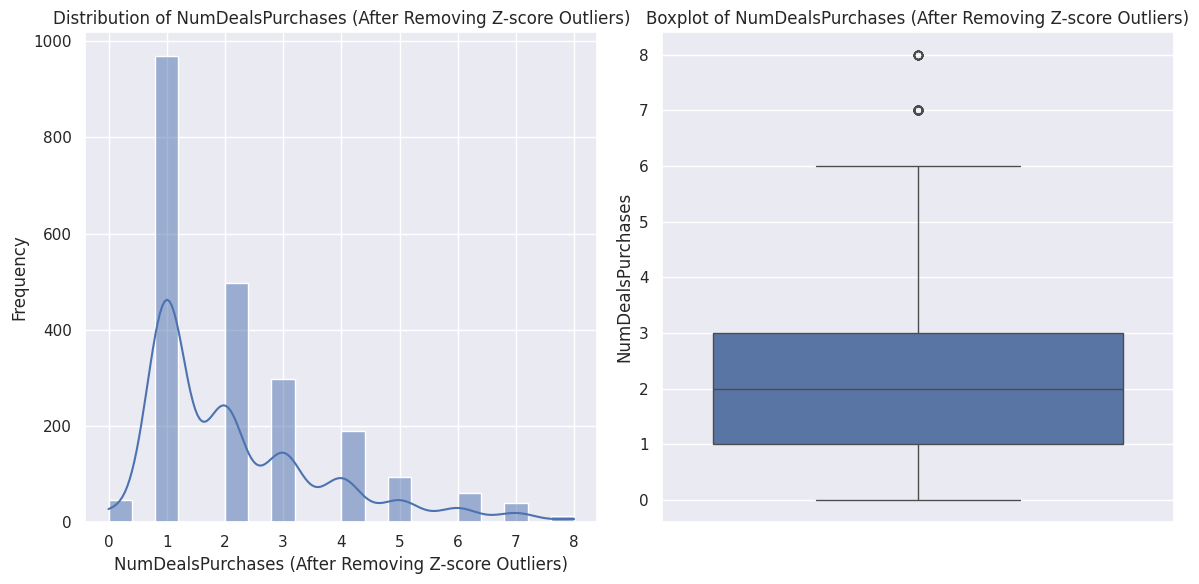


Descriptive Statistics for NumDealsPurchases:
count    2208.000000
mean        2.191576
std         1.571720
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: NumDealsPurchases, dtype: float64


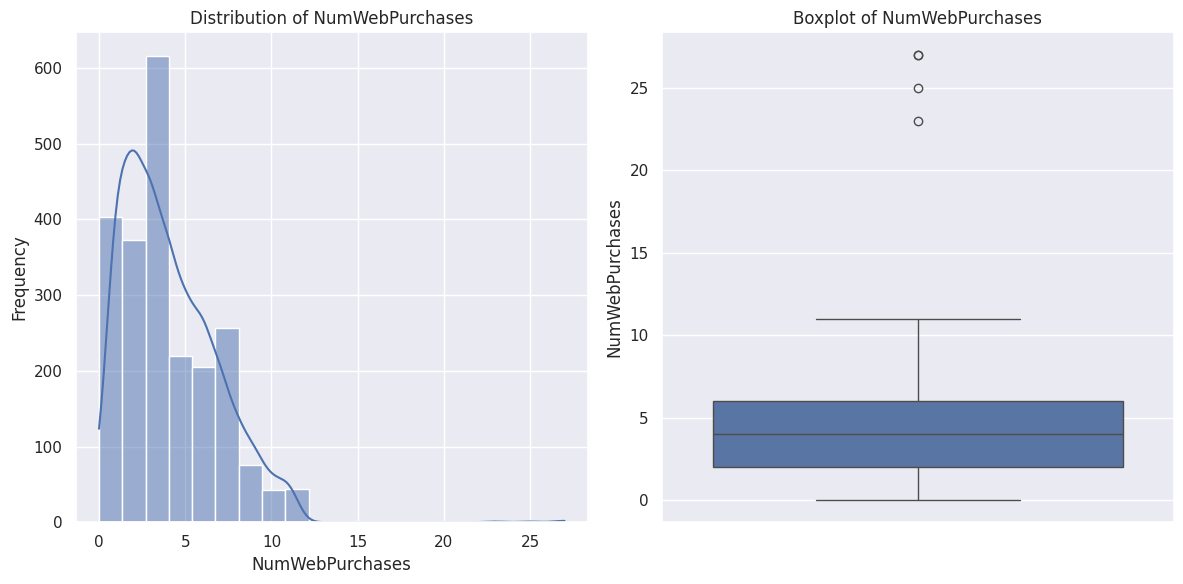

Outliers using Z-score method:
14      25
210     27
449     27
2063    23
Name: NumWebPurchases, dtype: int64

Outliers using IQR method:
14      25
210     27
449     27
2063    23
Name: NumWebPurchases, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



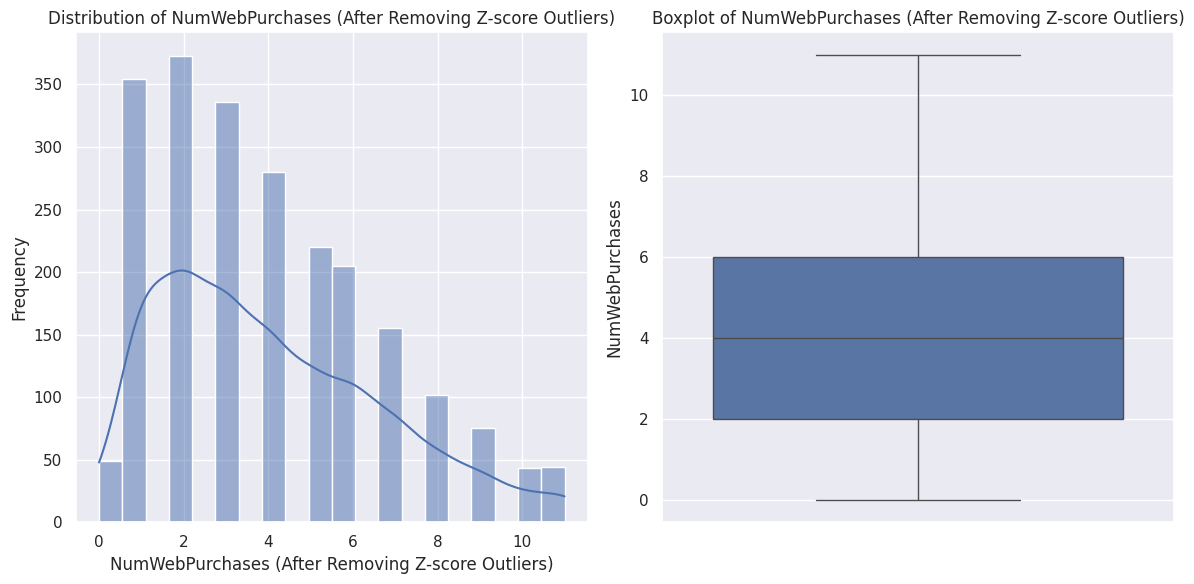


Descriptive Statistics for NumWebPurchases:
count    2236.000000
mean        4.046512
std         2.628289
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        11.000000
Name: NumWebPurchases, dtype: float64


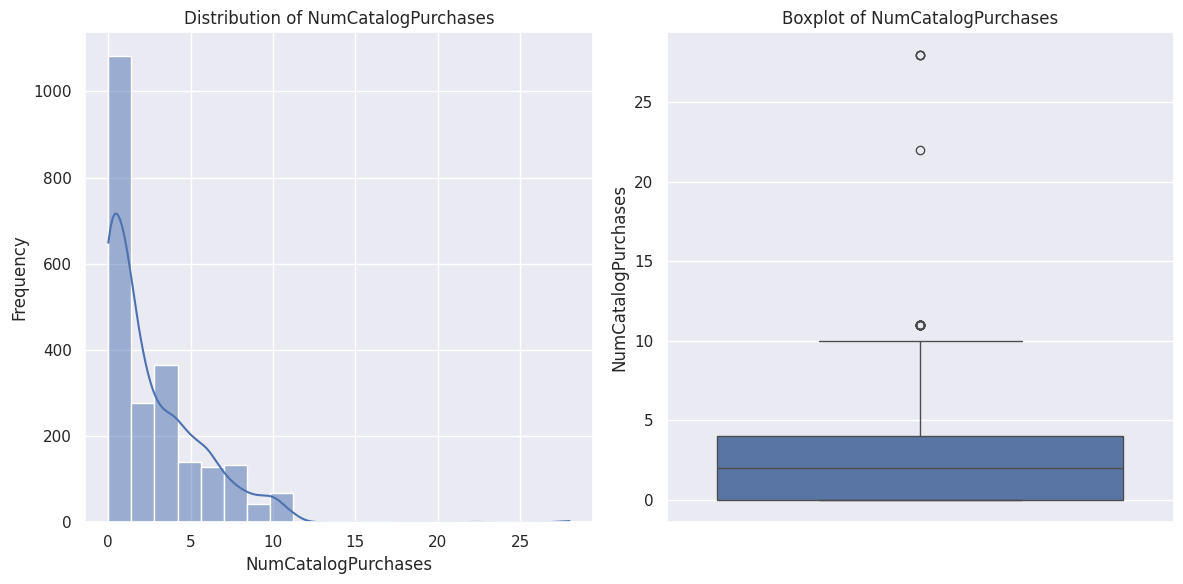

Outliers using Z-score method:
325     28
497     28
961     28
2204    22
Name: NumCatalogPurchases, dtype: int64

Outliers using IQR method:
292     11
325     28
399     11
434     11
497     28
588     11
661     11
678     11
803     11
911     11
961     28
1275    11
1368    11
1404    11
1489    11
1628    11
1687    11
1834    11
2026    11
2060    11
2061    11
2074    11
2204    22
Name: NumCatalogPurchases, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



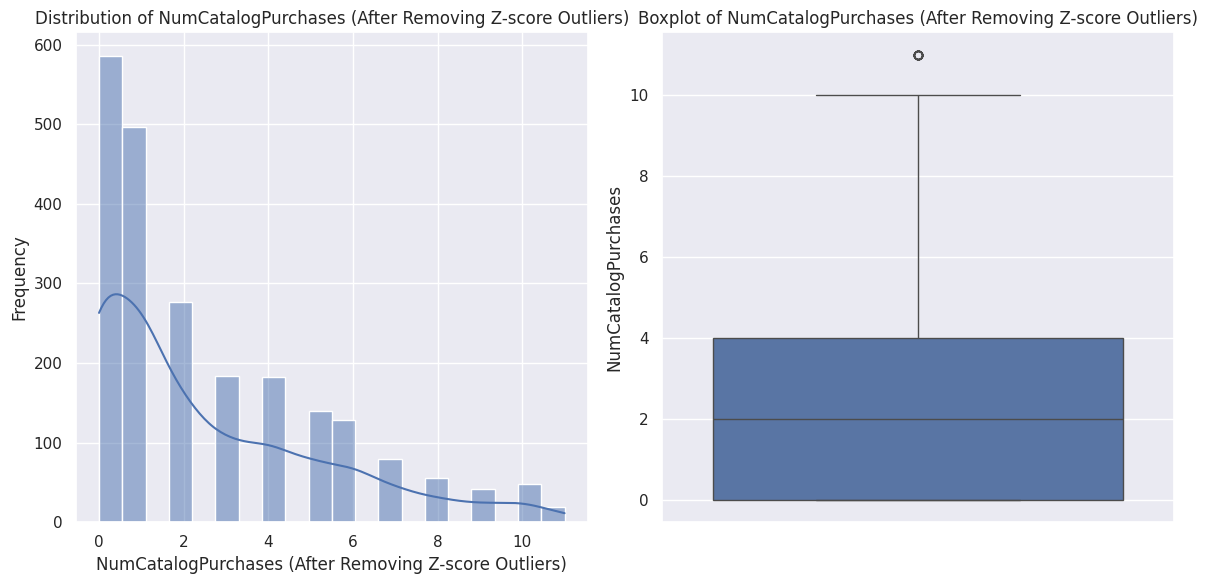


Descriptive Statistics for NumCatalogPurchases:
count    2236.000000
mean        2.619410
std         2.743886
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: NumCatalogPurchases, dtype: float64


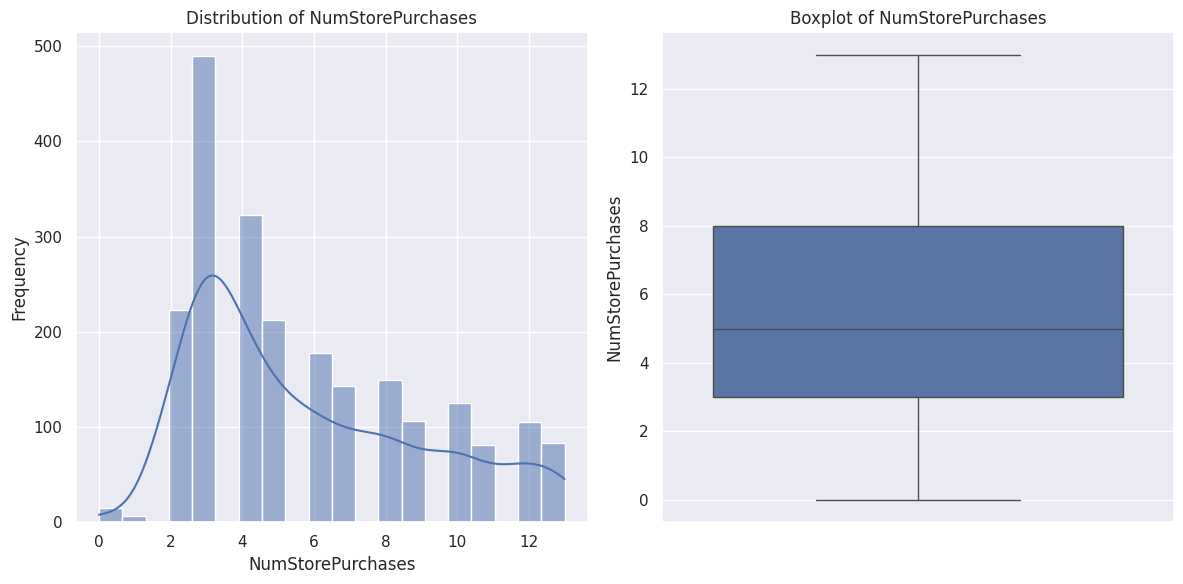

Outliers using Z-score method:
Series([], Name: NumStorePurchases, dtype: int64)

Outliers using IQR method:
Series([], Name: NumStorePurchases, dtype: int64)


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



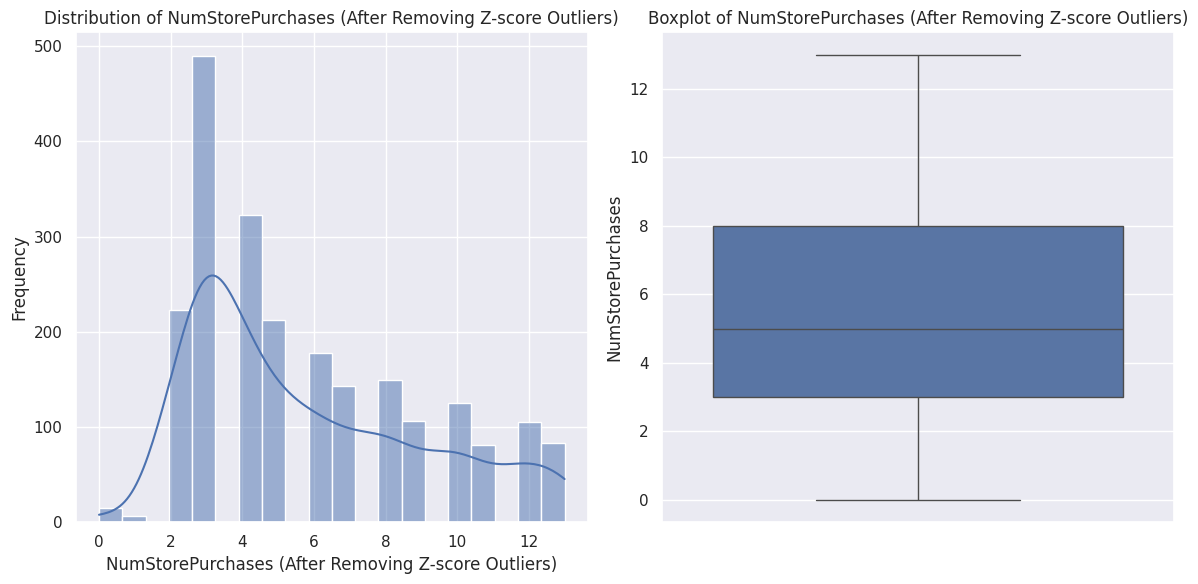


Descriptive Statistics for NumStorePurchases:
count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


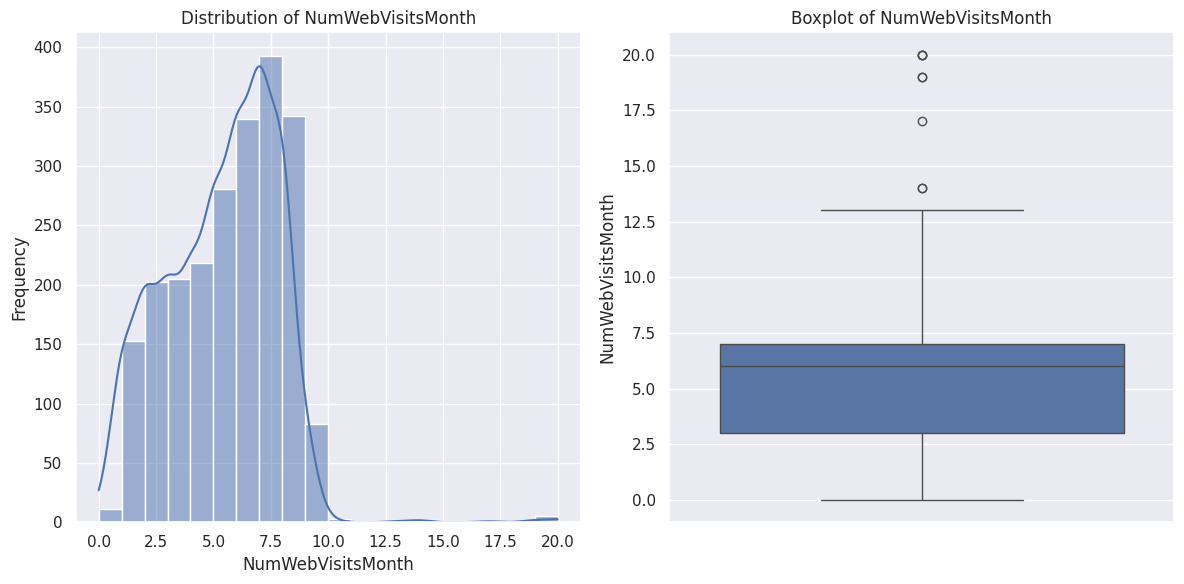

Outliers using Z-score method:
60      17
299     13
456     14
663     19
1291    14
1416    19
1466    20
1533    20
1721    20
Name: NumWebVisitsMonth, dtype: int64

Outliers using IQR method:
60      17
456     14
663     19
1291    14
1416    19
1466    20
1533    20
1721    20
Name: NumWebVisitsMonth, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



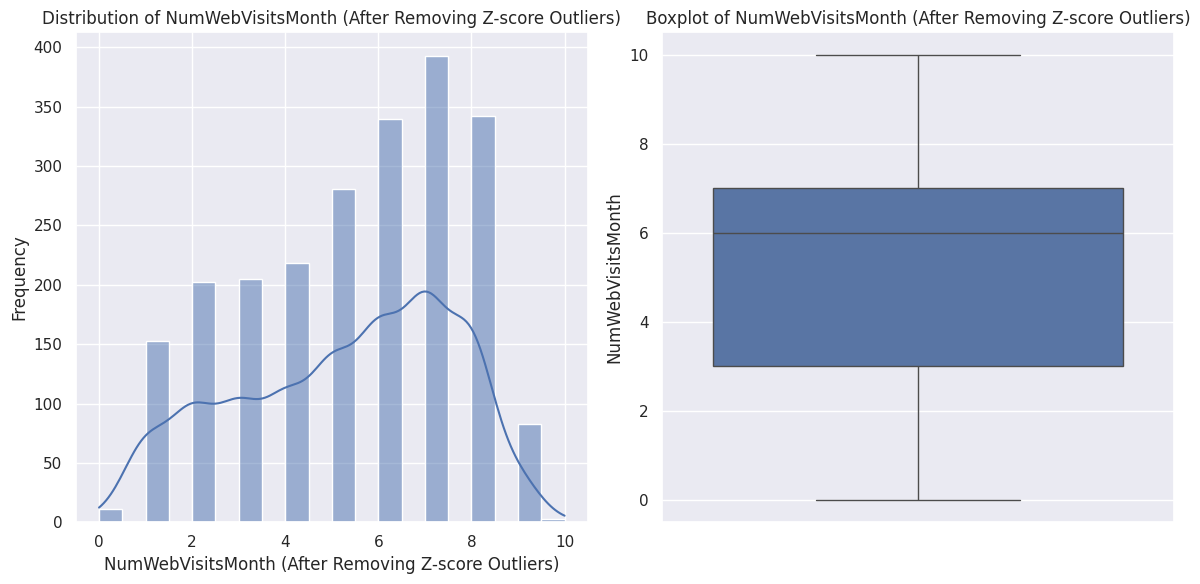


Descriptive Statistics for NumWebVisitsMonth:
count    2231.000000
mean        5.268041
std         2.301463
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: NumWebVisitsMonth, dtype: float64


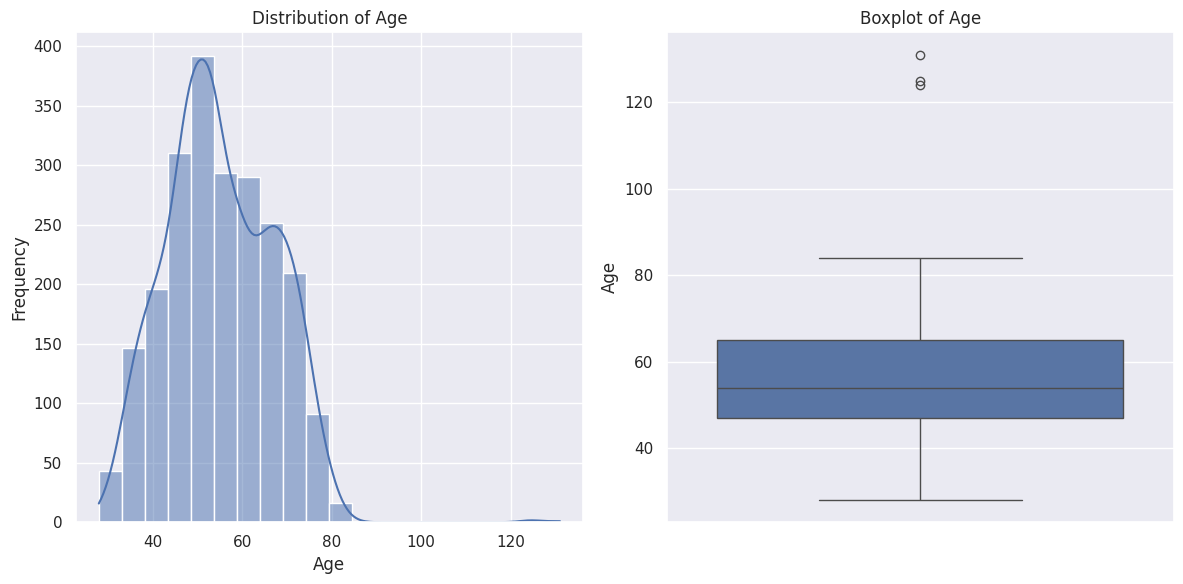

Outliers using Z-score method:
513     131
827     125
2233    124
Name: Age, dtype: int64

Outliers using IQR method:
513     131
827     125
2233    124
Name: Age, dtype: int64


<ipython-input-125-104fae8cbfab>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



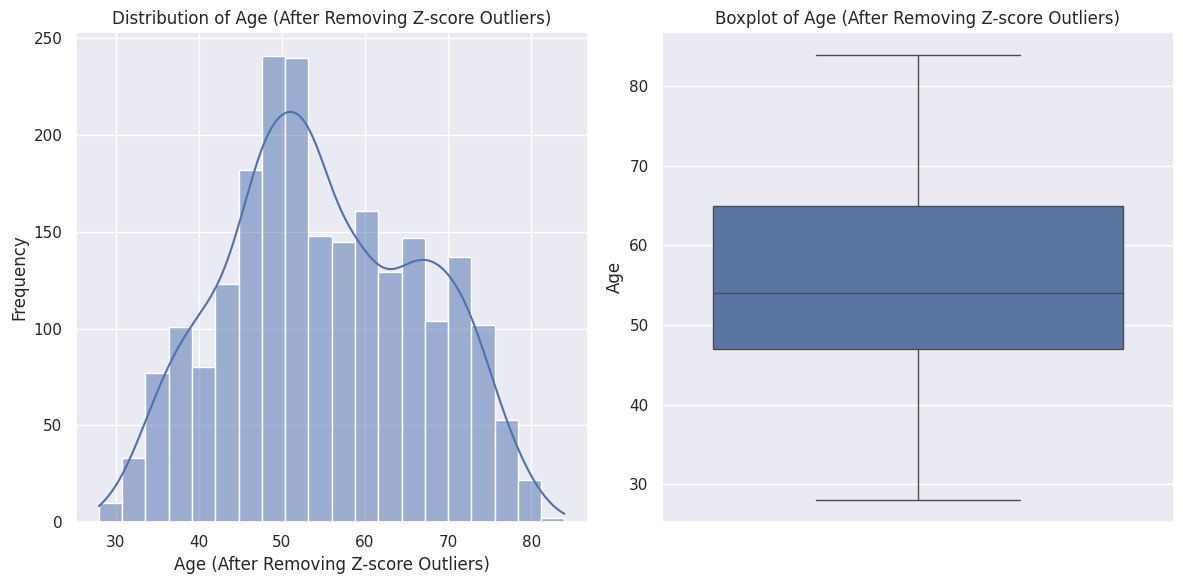


Descriptive Statistics for Age:
count    2237.000000
mean       55.098346
std        11.701917
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: Age, dtype: float64


In [ ]:
handling_outliers(features_to_be_handled, superstore_df) # Call function

In [ ]:
print('************ Statistical information about the dataset for numerical variables after handling of outliers***************')
summary_statistics=statistical_description() # #Call the statistical description function after removal of outliers.
summary_statistics

************ Statistical information about the dataset for numerical variables after handling of outliers***************


count          mean           std     min       25%  \
Income               2232.0  51630.926971  20601.679542  1730.0  35434.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2224.0    295.880396    324.029089     0.0     23.00   
MntFruits            2176.0     22.122243     31.776761     0.0      1.00   
MntMeatProducts      2203.0    152.733091    196.104007     0.0     15.00   
MntFishProducts      2182.0     32.526581     45.724871     0.0      2.00   
MntSweetProducts     2178.0     22.859504     33.174910     0.0      1.00   
MntGoldProds         2196.0     40.215847     44.950997     0.0      8.75   
NumDealsPurchases    2208.0      2.191576      1.571720     0.0      1.00   
NumWebPurchases      2236.0      4.046512      2.628289     0.0      2.00   
NumCatalogPurchases  2236.0      2.619410      2.743886     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2231.0      5.268041      2.301463     0.0      3.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Age                  2237.0     55.098346     11.701917    28.0     47.00   

                      median      75%       max   median      variance  \
Income               51381.5  68118.0  113734.0  51381.5  4.244292e+08   
Kidhome                  0.0      1.0       2.0      0.0  2.898725e-01   
Teenhome                 0.0      1.0       2.0      0.0  2.965219e-01   
Recency                 49.0     74.0      99.0     49.0  8.388237e+02   
MntWines               172.0    493.0    1311.0    172.0  1.049949e+05   
MntFruits                7.0     28.0     144.0      7.0  1.009763e+03   
MntMeatProducts         64.0    217.0     843.0     64.0  3.845678e+04   
MntFishProducts         11.0     43.0     201.0     11.0  2.090764e+03   
MntSweetProducts         8.0     30.0     150.0      8.0  1.100575e+03   
MntGoldProds            24.0     53.0     200.0     24.0  2.020592e+03   
NumDealsPurchases        2.0      3.0       8.0      2.0  2.470305e+00   
NumWebPurchases          4.0      6.0      11.0      4.0  6.907903e+00   
NumCatalogPurchases      2.0      4.0      11.0      2.0  7.528912e+00   
NumStorePurchases        5.0      8.0      13.0      5.0  1.056873e+01   
NumWebVisitsMonth        6.0      7.0      10.0      6.0  5.296732e+00   
Response                 0.0      0.0       1.0      0.0  1.269309e-01   
Complain                 0.0      0.0       1.0      0.0  9.291257e-03   
Age                     54.0     65.0      84.0     54.0  1.369349e+02   

                        mode  
Income               51381.5  
Kidhome                  0.0  
Teenhome                 0.0  
Recency                 56.0  
MntWines                 2.0  
MntFruits                0.0  
MntMeatProducts          7.0  
MntFishProducts          0.0  
MntSweetProducts         0.0  
MntGoldProds             1.0  
NumDealsPurchases        1.0  
NumWebPurchases          2.0  
NumCatalogPurchases      0.0  
NumStorePurchases        3.0  
NumWebVisitsMonth        7.0  
Response                 0.0  
Complain                 0.0  
Age                     48.0

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
def plot_pdf_all_features(numerical_features):
    """
    This function plots the Probability Density Function (PDF) of all numerical features in the DataFrame.
    I/P args: numerical_features: DataFrame containing only the numerical features.
    O/P args:None
    """
    num_cols = len(numerical_features.columns)
    num_rows = int(np.ceil(num_cols / 4))  # Calculate the number of rows for subplot arrangement

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, feature_name in enumerate(numerical_features.columns):
        feature_data = numerical_features[feature_name]

        # Plot PDF using histogram with kde=True
        sns.histplot(feature_data, bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'PDF of {feature_name}')
        axes[i].set_xlabel(feature_name)
        axes[i].set_ylabel('PDF')

        # Add mean line
        mean_value = feature_data.mean()
        axes[i].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
        axes[i].legend()

    # Hide unused subplots if the number of features is not a multiple of 4
    for j in range(num_cols, num_rows * 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

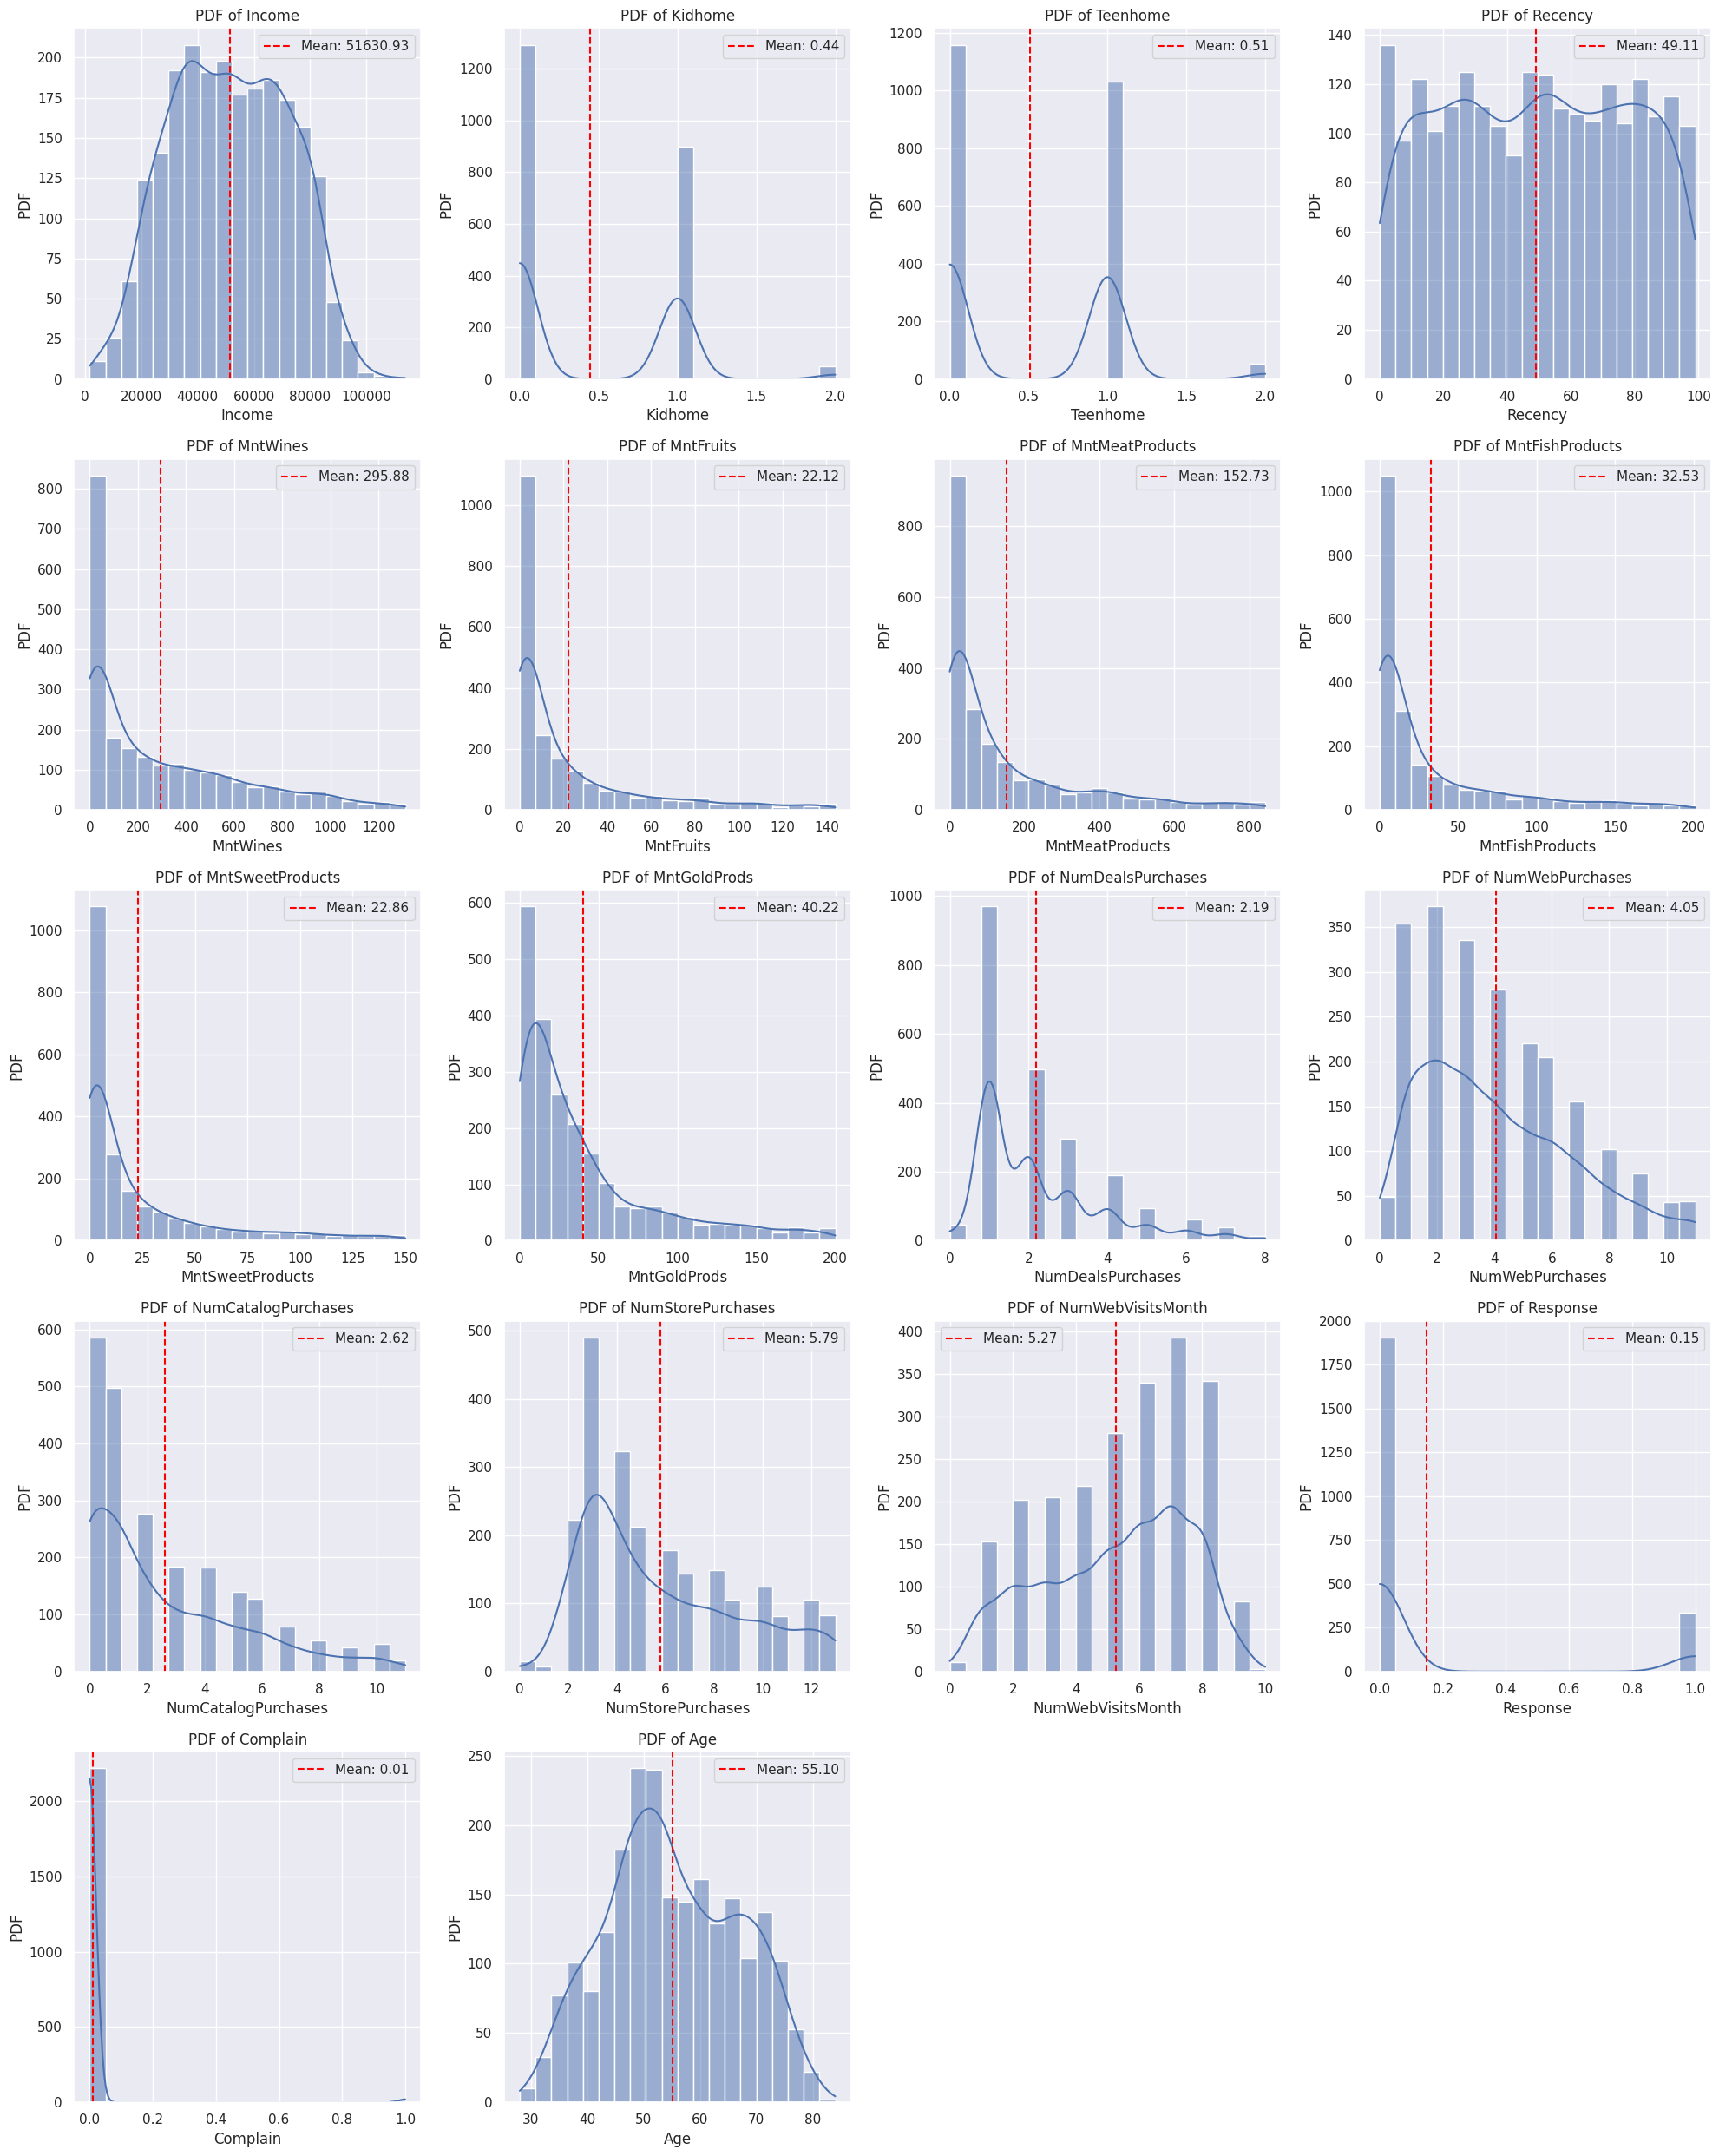

In [ ]:
#Call function for plotting pdfs of all the numerical features of the datset.
plot_pdf_all_features(superstore_df.select_dtypes(include=['int64', 'float64']))

Observation:


*   
The plot of all the products sold in last 2 years, i.e., wines,
fruits, fish, sweets, meat and gold products are right skewed. Hence, no single product is top selling.





###**First feature: Income**

   

* It follows a continuous probability distribution.  
* **Distribution:** The pdf of the 'Income' appears to follow a normal distribution approximately. Also, its mean value lies in the middle.
*   Mean = **Expected value** = 51630.93



   

In [ ]:
import scipy.stats as stats

def check_normal_distribution(df, feature):
    '''
    This function tries to find the best-fitting bell
    curve by figuring out the average score (mean) and how spread
    out the scores are (standard deviation).
    I/P args: df- pandas dataframe
              feature- feature whose distribution has to be checked
    O/P args: none
    '''
    # Extract the data for the specified feature
    data = df[feature]

    non_finite_values = np.isnan(data) | np.isinf(data) #Check for null or non finite values
    print(non_finite_values)
    num_non_finite_values = non_finite_values.sum() #No. of null or non finite values
    print(num_non_finite_values)
    data = data[~non_finite_values] #Remove these values since norm.fit wont work for them

    # Fit a normal distribution to the data
    mean, std = stats.norm.fit(data)

    print(f"Normal distribution parameters: mu = {mean}, std = {std}")

In [ ]:
# Function calling for checking whether 'Income' feature is normally distributed or not.
check_normal_distribution(superstore_df, 'Income')

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool
8
Normal distribution parameters: mu = 51630.92697132617, std = 20597.063953618526


Inference:


*   After using norm.fit, the values of mean and standard deviation are roughly the same as those calculate using .describe(). Hence, the feature 'Income' is normally distributed.


In [ ]:
'''Calculation of probabilities for the 'Income' feature:
'''
# Values obtained from above statistical description
mean_income = 51630.926971
std_dev_income = 20601.679542

# Probability of Income within 1 or 2 Standard Deviations from the Mean
prob_within_1_std = stats.norm.cdf(mean_income + std_dev_income, mean_income, std_dev_income) - stats.norm.cdf(mean_income - std_dev_income, mean_income, std_dev_income)
prob_within_2_std = stats.norm.cdf(mean_income + 2 * std_dev_income, mean_income, std_dev_income) - stats.norm.cdf(mean_income - 2 * std_dev_income, mean_income, std_dev_income)

print("Probability of Income within 1 standard deviation from the mean:", prob_within_1_std)
print("Probability of Income within 2 standard deviations from the mean:", prob_within_2_std)

# Example 2: Probability of Income exceeding a certain threshold (e.g., $51630.93)
threshold_income = 51630.93
prob_exceed_threshold = 1 - stats.norm.cdf(threshold_income, mean_income, std_dev_income)

print("Probability of Income exceeding $51630.93:", prob_exceed_threshold)

# Example 3: Probability Density at a Specific Income Value (e.g., $51630.93)
specific_income = 51630.93
prob_density_at_specific_income = stats.norm.pdf(specific_income, mean_income, std_dev_income)

print("Probability density at Income = $51630.93:", prob_density_at_specific_income)



Probability of Income within 1 standard deviation from the mean: 0.682689492137086
Probability of Income within 2 standard deviations from the mean: 0.9544997361036416
Probability of Income exceeding $51630.93: 0.4999999413447741
Probability density at Income = $51630.93: 1.936455130214589e-05


In [ ]:
#To find out the probability that
income_prob_50k = stats.norm.cdf(50000, mean_income, std_dev_income)
income_prob_100k = stats.norm.cdf(100000, mean_income, std_dev_income)
print(income_prob_50k)
print(income_prob_100k)

0.4684507878980111
0.9905582241952793


###**Second feature: Kidhome**
   

*  It follows a discrete probability distribution.
* **Distribution:**  The pdf of the 'Kidhome' appears to follow a Poisson distribution because the Poisson distribution represents the number of events occurring in a fixed interval of time or space. The feature Kidhome denotes the numbers of kids of a customer in their lifetime.
*   Mean = **Expected value** = 0.44
* Median =0

   

In [ ]:
# Parameters for the Poisson distribution
mu = 0.44

# Probability of a customer having exactly 0 kids
prob_0_kids = stats.poisson.pmf(0, mu)

# Probability of a customer having at least 1 kid
prob_at_least_1_kid = 1 - stats.poisson.cdf(0, mu)

# Probability of a customer having at least 2 kids
prob_at_least_2_kids = 1 - stats.poisson.cdf(1, mu)

print("Probability of a customer having exactly 0 kids:", prob_0_kids)
print("Probability of a customer having at least 1 kid:", prob_at_least_1_kid)
print("Probability of a customer having at least 2 kids:", prob_at_least_2_kids)


Probability of a customer having exactly 0 kids: 0.6440364210831414
Probability of a customer having at least 1 kid: 0.3559635789168586
Probability of a customer having at least 2 kids: 0.07258755364027647


###**Third feature: Teenhome**
   

*  It follows a discrete probability distribution.
* **Distribution:**  The pdf of the 'Teenhome' appears to follow a Poisson distribution because the Poisson distribution represents the number of events occurring in a fixed interval of time or space. The feature Kidhome denotes the numbers of kids of a customer in their lifetime.
*   Mean = **Expected value** = 0.51
* Median =0

   

In [ ]:
# Parameters for the Poisson distribution
mu = 0.51

# Probability of a customer having exactly 0 teenagers
prob_0_teenagers = stats.poisson.pmf(0, mu)

# Probability of a customer having at least 1 teenager
prob_at_least_1_teenager = 1 - stats.poisson.cdf(0, mu)

# Probability of a customer having at least 2 teenagers
prob_at_least_2_teenagers = 1 - stats.poisson.cdf(1, mu)

print("Probability of a customer having exactly 0 teenagers:", prob_0_teenagers)
print("Probability of a customer having at least 1 teenager:", prob_at_least_1_teenager)
print("Probability of a customer having at least 2 teenagers:", prob_at_least_2_teenagers)


Probability of a customer having exactly 0 teenagers: 0.6004955788122659
Probability of a customer having at least 1 teenager: 0.3995044211877339
Probability of a customer having at least 2 teenagers: 0.09325167599347839


###**Fourth feature: Recency**
   
* It follows a continuous probability distribution.  
* **Distribution:**  The pdf of this model appears to follow a gamma distribution as it respresnts a continuous variable which denotes time interval between two events i.e., the time between the last day of purchase and current day.
*   Mean = **Expected value** = 49.11
* On an average, customers have gone roughly 50 days without making any purchases.

   

###**Fifth to Tenth features: Amount spent on various products in the last 2 years, such as:**

**MntFishProducts** - the amount spent on fish products in the last 2 years

**MntMeatProducts** - the amount spent on meat products in the last 2 years

**MntFruits** - the amount spent on fruits products in the last 2 years

**MntSweetProducts** - amount spent on sweet products in the last 2 years

**MntWines** - the amount spent on wine products in the last 2 years

**MntGoldProds** - the amount spent on gold products in the last 2 years

*   All of these follow continuous probability distribution.
*   These seem to follow exponential distribution (which is a special case of gamma distribution).

### **Eleventh feature: NumDealsPurchases:**

*  It follows a continuous probability distribution.
*  Its pdf appears to be gamma distributed.
* Expected value= 2.19



### **Twelfth feature: NumWebPurchases:**

*  It follows a continuous probability distribution.
*  Its pdf appears to be gamma distributed.
* Expected value= 4.05



### **Thirteenth feature: NumCatalogPurchases:**

*  It follows a continuous probability distribution.
*  Its pdf appears to be exponentially distributed.
* Expected value= 2.62



### **Fourteenth feature: NumStorePurchases:**
*  It follows a continuous probability distribution.
*  Its pdf appears to be gamma distributed.
* Expected value= 5.79



### **Fifteenth feature: NumWebVistsMonth:**
*  It follows a continuous probability distribution.
*  Its pdf appears to be gamma distributed.
* Expected value= 4.05



### **Sixteenth feature: Response:**
*  It follows a discrete probability distribution.
*  Its pdf appears to be follow binomial distributed.
* Expected value= 0.15



### **Seventeenth feature: Complain:**
*  It follows a discrete probability distribution.
*  Its pdf appears to follow binomial distributed.
* Expected value= 0.01



###**Eighteenth feature: Age**
   

*  It follows a continuous probability distribution.
* **Distribution:**  The pdf of the 'Age' appears to follow a normal distribution approximately.
*   Mean = **Expected value** = 55.10

   

In [ ]:
# Function calling for checking whether 'Age' feature is normally distributed or not.
check_normal_distribution(superstore_df, 'Age')

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Age, Length: 2240, dtype: bool
3
Normal distribution parameters: mu = 55.098345999105945, std = 11.69930142988626


Inference:
After using norm.fit, the values of mean and standard deviation are roughly the same as those calculate using .describe(). Hence, the feature 'Age' is normally distributed.

In [ ]:
# Calculate the first and third quartiles
q1 = superstore_df['Age'].quantile(0.25)
q3 = superstore_df['Age'].quantile(0.75)

# Interpret the age range
print(f"Most customers are between {q1} to {q3} years old.")

Most customers are between 47.0 to 65.0 years old.


More than 50% customers spend less than 1000$.
PS: Prove this by calculation of suitable probability, eg.: cdf etc.

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

### To underand the segmentation of customers based on their behaviour and characteristics, a few visualizations are done which are depicted ahead (Bivariate and Multi-variate analysis).



### **(I.) Combine the total amount of products sold in the past 2 years to calculate the total expeses.**



In [ ]:
superstore_df['Expenses'] = superstore_df['MntWines'] + superstore_df['MntFruits'] + superstore_df['MntMeatProducts'] + superstore_df['MntFishProducts'] + superstore_df['MntSweetProducts'] + superstore_df['MntGoldProds']

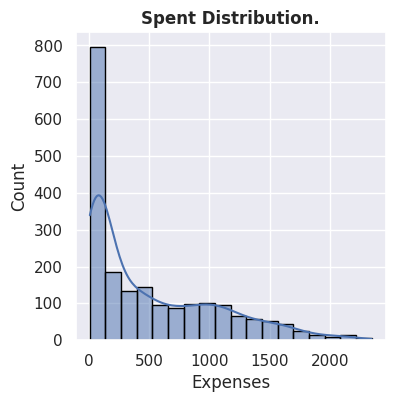

In [ ]:
sns.histplot(data=superstore_df, x="Expenses", kde=True, edgecolor="black")
plt.title("Spent Distribution.", weight="bold")
plt.show()

Observation:


*   In the last 2 years, as the amount spent on all the products is increasing, the count of customers who made the purchase is decreasing.

###**(II.) Plot age v/s expenses**

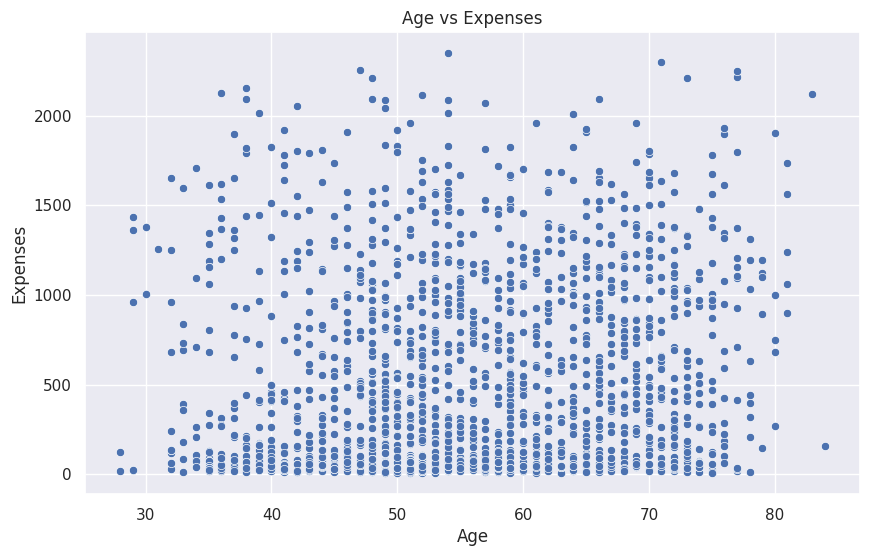

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Expenses', data=superstore_df)
plt.title('Age vs Expenses')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.grid(True)
plt.show()


In [ ]:
# Calculate correlation between Age and Expenses
correlation = superstore_df['Age'].corr(superstore_df['Expenses'])

print("Correlation between Age and Expenses:", correlation)


Correlation between Age and Expenses: 0.15789400964642486


Observation:


*   A correlation coefficient of 0.1578 suggests a weak positive correlation between Age and Expenses.

###**(III.) Make a plot between total purchases made (NumTotalPurchases), no. of children at home and the eductaion of the customer.**

In [ ]:
#Combine the total no. of purchases made from all sources.
superstore_df['NumTotalPurchases'] = superstore_df['NumWebPurchases'] + superstore_df['NumCatalogPurchases'] + superstore_df['NumStorePurchases'] + superstore_df['NumDealsPurchases']
superstore_df['NumTotalPurchases'].unique()

array([15., 18., 11.,  4.,  8., 17., 28.,  7., 20., 22., 12., 16.,  5.,
       nan, 26., 10., 14.,  6., 19., 24., 35., 21.,  2., 23.,  9., 29.,
       27., 25., 30., 31.,  1., 13., 32.,  0., 34., 33.])

In [ ]:
#Calculate the total no. of children at home by adding the no. of kids and teens at home.
superstore_df['Kids'] = superstore_df['Kidhome'] + superstore_df['Teenhome']

In [ ]:
#Create a tree map to describe the relationship between education, no. of children and total purchases
education_children = superstore_df.groupby(['Education', 'Kids', 'NumTotalPurchases']).size().reset_index().rename(columns={0: 'count'})

fig = px.treemap(education_children, path=[px.Constant("Customers"), 'Education', 'Kids'], values='count',
                  color='NumTotalPurchases', hover_data=['count'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(education_children['NumTotalPurchases'], weights=education_children['count']))

fig.update_traces(textinfo="label+percent parent")

fig.update_layout(title_text="<i> Education </i> X <i> NumofChildren </i> X <i> Total Purchases </i>", title_x=0.5, height=500, template='plotly_dark',
        font=dict(
            family="Rubik",
            size=14)
)

fig.show()

Observation:


*   Most no. of purchases were made by customers who were post graduate(PG) and had no kids, followed by those with 1 kid.
*   The least no. of purchases were made by customers who were under graduate (UG) and had 1 kid.



###**(IV.) Plot between Marital_Status and Expenses.**

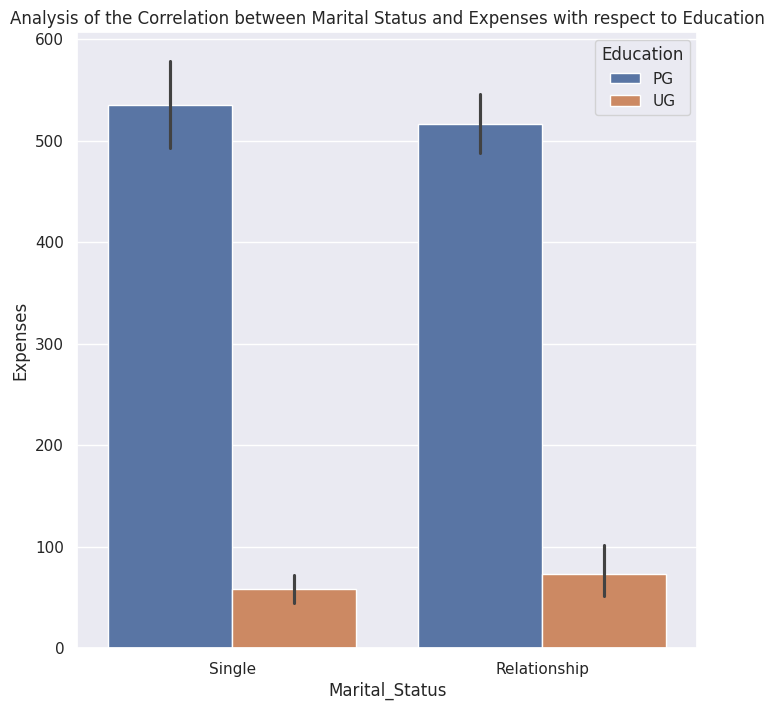

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x=superstore_df['Marital_Status'], y=superstore_df['Expenses'], hue = superstore_df["Education"])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show()

Obseravtions:


*   For PG customers, expenses were less when they were in a relationship.
*   For UG customers, expenses were more when they were in a relationship.



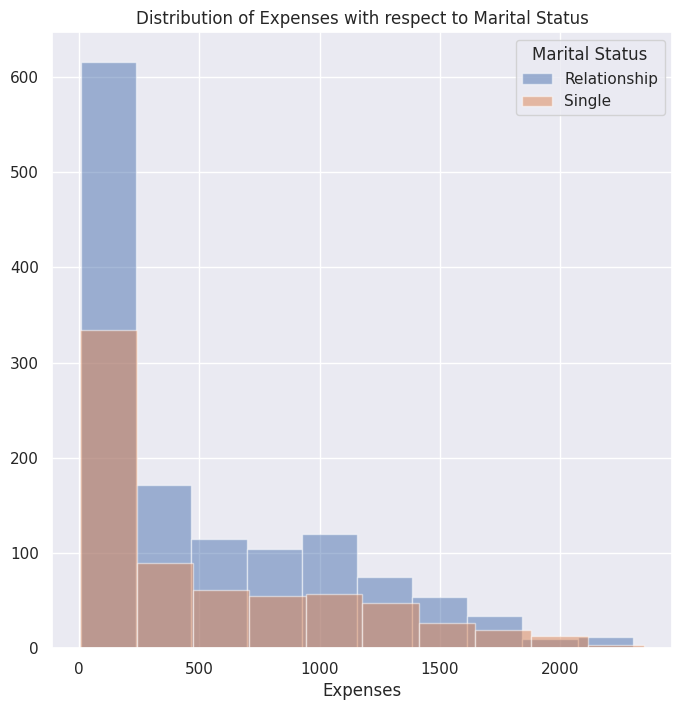

In [ ]:
#Distribution of Expenses w.r.t. marital_status
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = superstore_df[superstore_df["Marital_Status"] == "Relationship"], alpha = 0.5, label = "Relationship")
plt.hist("Expenses", data = superstore_df[superstore_df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Expenses with respect to Marital Status")
plt.xlabel("Expenses")
plt.legend(title = "Marital Status")
plt.show()

Observation:


*   Those customers who are in a relationship have more expenses.

###**(V). Plot between Expenses and Education**

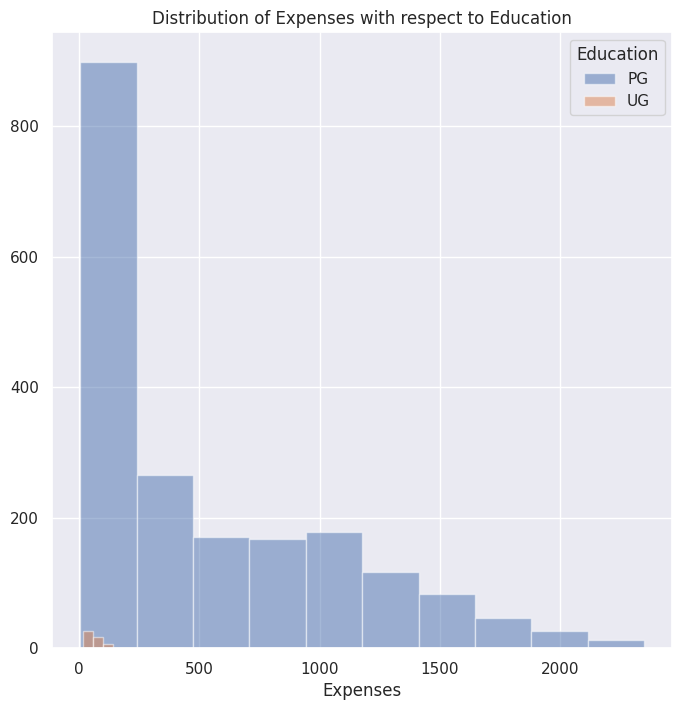

In [ ]:
plt.figure(figsize=(8,8))
plt.hist("Expenses", data = superstore_df[superstore_df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("Expenses", data = superstore_df[superstore_df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Expenses with respect to Education")
plt.xlabel("Expenses")
plt.legend(title = "Education")
plt.show()

Observation:


*   For customers who have done higher education such as post graduation (PG), the Expenses are very high as compared to those who have are undergraduate (UG).




###**(VI.) Plot of total number of purchases (made from different areas, e.g., store, web, catalog, discount and deals) and Education**

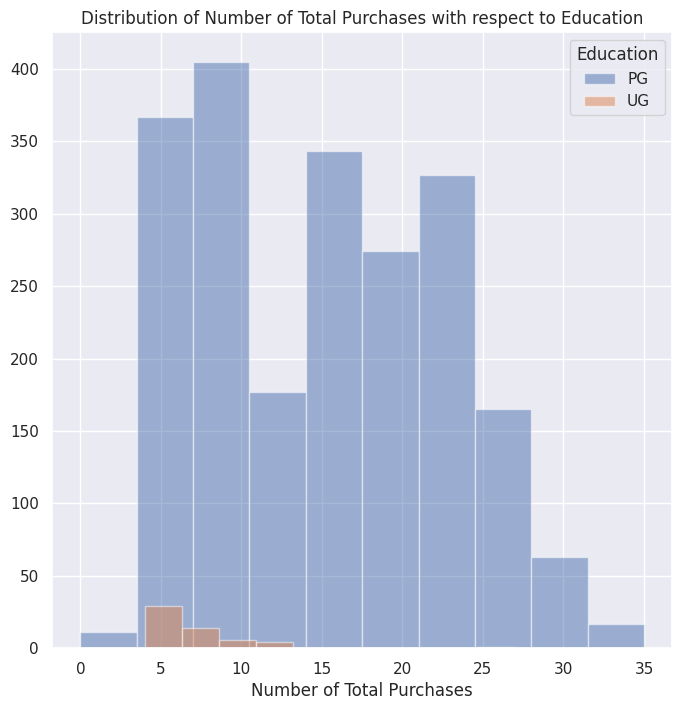

In [ ]:
plt.figure(figsize=(8,8))
plt.hist("NumTotalPurchases", data = superstore_df[superstore_df["Education"] == "PG"], alpha = 0.5, label = "PG")
plt.hist("NumTotalPurchases", data = superstore_df[superstore_df["Education"] == "UG"], alpha = 0.5, label = "UG")
plt.title("Distribution of Number of Total Purchases with respect to Education")
plt.xlabel("Number of Total Purchases")
plt.legend(title = "Education")
plt.show()

Observation:


*   For PG customers, the no. of purchases by different ways is more than UG which is quite obvious because PG students have more expenses.



###**(VII.) Plot between Age and Marital_status**

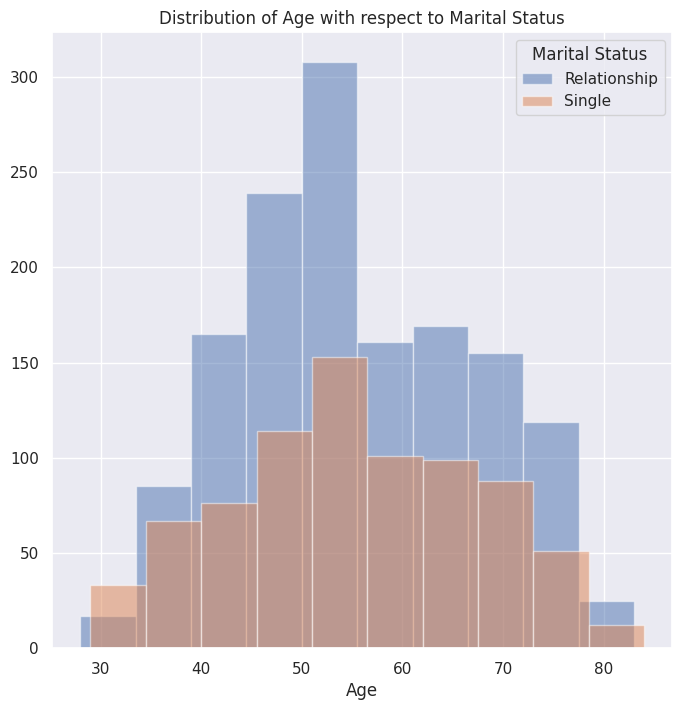

In [ ]:
plt.figure(figsize=(8,8))
plt.hist("Age", data = superstore_df[superstore_df["Marital_Status"] == "Relationship"], alpha = 0.5, label = "Relationship")
plt.hist("Age", data = superstore_df[superstore_df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Age with respect to Marital Status")
plt.xlabel("Age")
plt.legend(title = "Marital Status")
plt.show()

Observation:


*   The distributions for both appear to be more or less similar.The customers who are in a relationship have slightly less age as the distribution is shifted slightly left in comparison to the signel customers.



###**(VIII.) Distribution of income w.r.t. Marital_status**

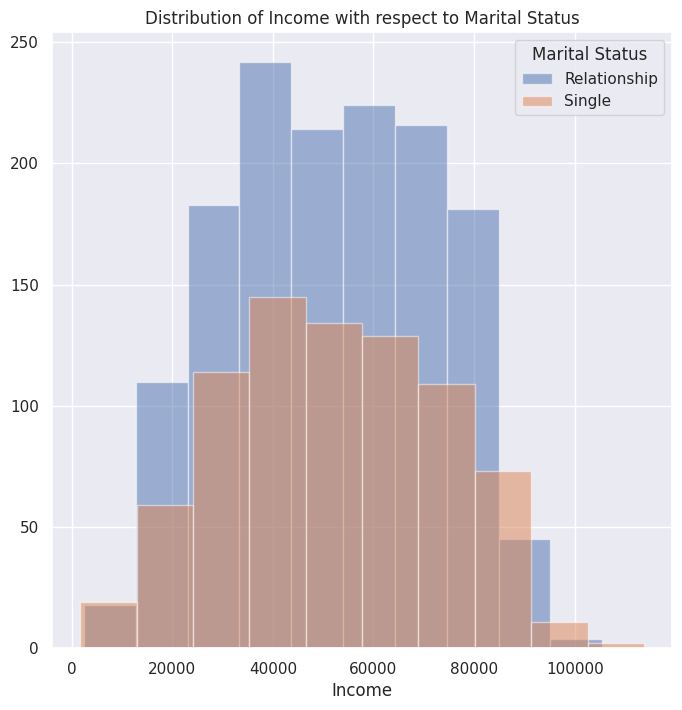

In [ ]:
plt.figure(figsize=(8,8))
plt.hist("Income", data = superstore_df[superstore_df["Marital_Status"] == "Relationship"], alpha = 0.5, label = "Relationship")
plt.hist("Income", data = superstore_df[superstore_df["Marital_Status"] == "Single"], alpha = 0.5, label = "Single")
plt.title("Distribution of Income with respect to Marital Status")
plt.xlabel("Income")
plt.legend(title = "Marital Status")
plt.show()

Observation:


*   There is not much difference between Income of customers who are in a relationship and those who are not.



In [ ]:
#Income Vs. Expenses
superstore_df[["Income", "Expenses"]].corr()

Income  Expenses
Income    1.000000  0.814482
Expenses  0.814482  1.000000

###**(IX.) Plot between Income, Education and Expenses**

In [ ]:
fig = px.scatter(data_frame=superstore_df, x="Income",y="Expenses", color="Education",
                 color_discrete_sequence=px.colors.qualitative.Antique,
                 title="<b>Correlation between Income and Spending")
fig.show()

Observation:


*   As the Income is increasing, so are the Expenses. Aslo, for PG customers, expenses and Income are more.



###**(X.) Plot between Recency, Expenses and NumTotalPurchases**


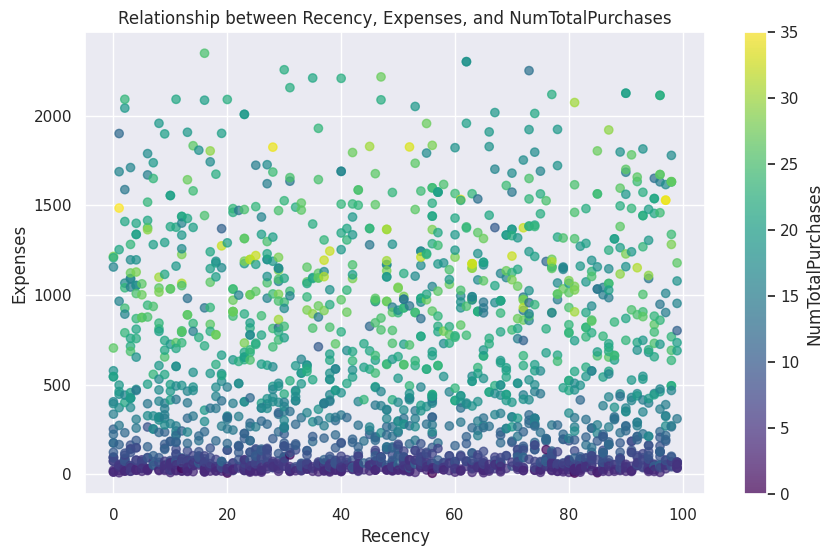

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(superstore_df['Recency'], superstore_df['Expenses'], c=superstore_df['NumTotalPurchases'], cmap='viridis', alpha=0.7)
plt.colorbar(label='NumTotalPurchases')
plt.xlabel('Recency')
plt.ylabel('Expenses')
plt.title('Relationship between Recency, Expenses, and NumTotalPurchases')
plt.grid(True)
plt.show()


Observation:


*   As the total number of purchases increase, so do the expenses. Also, Recency doesn't have much effect on the number of purchases.

###**(XI.)Plot of different amounts of products sold in the past 2 years.**

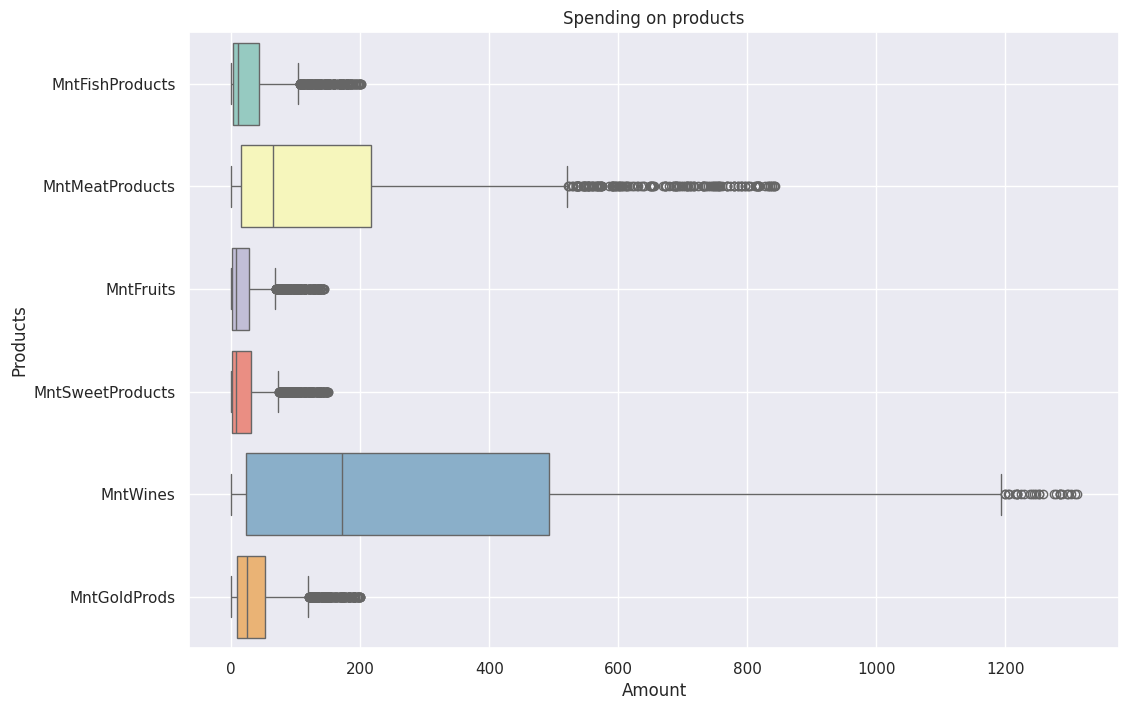

In [ ]:
features = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Create the plot
plt.figure(figsize=(12, 8))

# Plot boxplots for each feature
sns.boxplot(data=superstore_df[features], orient='h', palette='Set3')
plt.xlabel('Amount')
plt.ylabel('Products')
plt.title('Spending on products')

# Show the plot
plt.grid(True)
plt.show()


Inference:


*   Wines are the most sold, followed by meat products.



###**(XII.)Plot between the different products sold and Income**

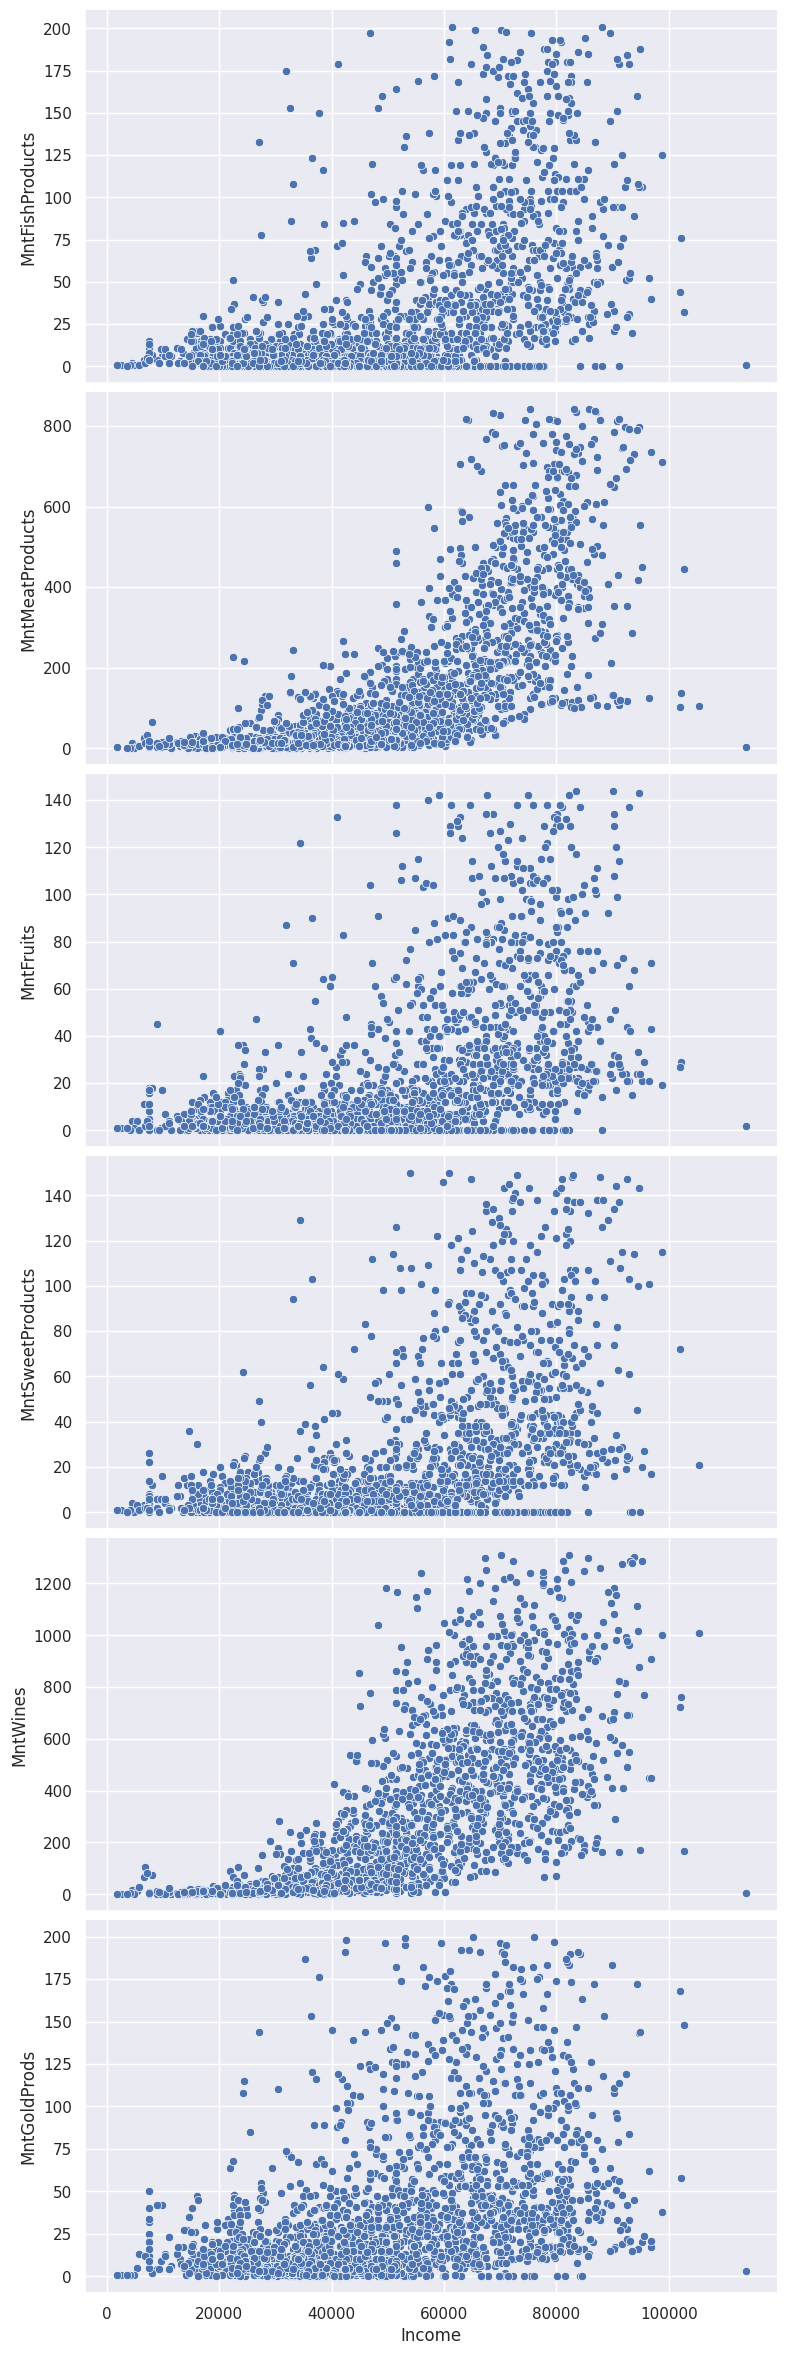

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to visualize against Income
features = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

# Create the pairplot with one row
g = sns.pairplot(superstore_df, x_vars=['Income'], y_vars=features, kind='scatter', diag_kind='hist', height=4, aspect=2)

# Adjust layout to display all graphs in one row
for ax in g.axes.flat:
    ax.set_xlabel('Income')

# Show the plot
plt.show()



Inference:
*   The amount of Wine, meat and gold products are slightly more for customers with higher income.




##**Inferences on segementation of customers on the basis of visualizations:**



*   There is a high correlation (0.72) between the amount of meat products and the number of purchases made using catalog. Thus more meat products were ordered via catalog purchase.
* Amount of wine purchased was higher in stores and through catalog purchase (with a moderate correlation of 0.64).
* Amount of fruits purchased has correlation with the amount of fish products purchased (with a moderate correlation of 0.59). Hence, those customers who brought fruits were more likely to bring fish as well.
* Income has a higher correlation with purchases made through catalog (of 0.59) as compared to purchases made by visiting the store (0.53). Though these features are only moderately correlated and hence one can't make precise predictions without further analysis.                                
* A correlation coefficient of 0.1578 suggests a weak positive correlation between Age and Expenses.              
* Most no. of purchases were made by customers who were post graduate(PG) and had no kids, followed by those with 1 kid.
The least no. of purchases were made by customers who were under graduate (UG) and had 1 kid.                        
*For PG customers, expenses were less when they were in a relationship.
For UG customers, expenses were more when they were in a relationship.                               
* Those customers who are in a relationship have more expenses.                                      
* For customers who have done higher education such as post graduation (PG), the Expenses are very high as compared to those who have are undergraduate (UG).                        
* For PG customers, the no. of purchases by different ways is more than UG which is quite obvious because PG students have more expenses.                  
* The distributions for both appear to be more or less similar.The customers who are in a relationship have slightly less age as the distribution is shifted slightly left in comparison to the signel customers.                            
* There is not much difference between Income of customers who are in a relationship and those who are not.                     
* As the Income is increasing, so are the Expenses. Aslo, for PG customers, expenses and Income are more.                
* As the total number of purchases increase, so do the expenses. Also, Recency doesn't have much effect on the number of purchases.            
* The amount of Wine, meat and gold products are slightly more for customers with higher income.



  

## Task 5: Conclusion and Recommendations


##**Segmentation of customers on the basis of visualizations and analysis:**


*   High income, Wine Enthusiasts: Customers who prefer Catalog and web purchases and have high income.   
* Fruit and fish consuming Customers who have high chances of purchasing them together.
* High Meat Product purchasers: Customers who purchase via catalog  
* People in a relationship and having an eduction of PG have more expenses.
* PG customers with one kid

##**Marketing strategy (Actionable recommendations based on customer behaviour):**


*   Target the wine enthusiast segment with promotions, wine tasting events, or wine club memberships to encourage repeat purchases.
* Also, make more offers on Catalog and web sites for such customers.
* For fruit and fish purchasing customers: Offer bundled deals or cross-promotions between these product categories to capitalize on this association and increase basket sizes.
* The customers who consume high meat products semm likely to prefer the convenience of ordering meat products through catalogs and may respond well to targeted promotions or discounts on meat products via catalog channels.
*Target younger customers with trendy or innovative products, while focusing on value and quality for older demographics.




## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

In [ ]:
https://drive.google.com/file/d/1Fbx4rFYe-S0mvdceTCyR2_UfAppocDhK/view?usp=sharing